In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar datos relevantes
cpu_usage = pd.read_csv('fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv')
memory_usage = pd.read_csv('fhir-fastapiapp/Memory Usage-data-2024-08-06 08_30_44.csv')
disk_io_utilization = pd.read_csv('fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv')
network_utilization = pd.read_csv('fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv')
response_time = pd.read_csv('fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv')
pod_counts = pd.read_csv('fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv')
memory_saturation = pd.read_csv('fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv')
cpu_saturation = pd.read_csv('fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv')


request_volume = pd.read_csv('fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv')
request_concurrency = pd.read_csv('fhir-fastapiapp/Request Concurrency-data-2024-08-06 08_24_27.csv')
response_time = pd.read_csv('fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv')
request_count_by_response_code = pd.read_csv('fhir-fastapiapp/Request Count in last minute by Response Code-data-2024-08-06 08_23_41.csv')
observed_concurrency = pd.read_csv('fhir-fastapiapp/Observed Concurrency-data-as-joinbyfield-2024-08-06 08_23_11.csv')
pod_counts = pd.read_csv('fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv')
pod_memory_usage = pd.read_csv('fhir-fastapiapp/Pod Memory Usage-data-2024-08-06 08_19_16.csv')
revision_cpu_usage = pd.read_csv('fhir-fastapiapp/Revision CPU Usage-data-as-joinbyfield-2024-08-06 08_19_02.csv')
request_concurrency = pd.read_csv('fhir-fastapiapp/Request Concurrency-data-2024-08-06 08_18_40.csv')
revision_pod_counts = pd.read_csv('fhir-fastapiapp/Revision Pod Counts-data-as-joinbyfield-2024-08-06 08_18_08.csv')



In [78]:
memory_usage

,Time,"100 -\n(\n avg(node_memory_MemAvailable_bytes{job=""node-exporter"", instance=""192.168.49.2:9100"", cluster=""""}) /\n avg(node_memory_MemTotal_bytes{job=""node-exporter"", instance=""192.168.49.2:9100"", cluster=""""})\n* 100\n)\n"
0,2024-08-06 10:30:00,23.4%
1,2024-08-06 10:31:00,23.8%
2,2024-08-06 10:32:00,23.8%
3,2024-08-06 10:33:00,23.9%
4,2024-08-06 10:34:00,24.0%
...,...,...
65,2024-08-06 11:37:00,49.0%
66,2024-08-06 11:42:00,51.2%
67,2024-08-06 11:43:00,51.4%
68,2024-08-06 11:44:00,51.2%


In [27]:
print(cpu_usage.columns)
print(memory_usage.columns)
print(disk_io_utilization.columns)
print(network_utilization.columns)
print(response_time.columns)
print(pod_counts.columns)
print(cpu_saturation.columns)


Index(['Time', '192.168.49.2:10250'], dtype='object')
Index(['Time', '100 -\n(\n  avg(node_memory_MemAvailable_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""}) /\n  avg(node_memory_MemTotal_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""})\n* 100\n)\n'], dtype='object')
Index(['Time', '192.168.49.2:9100 sda'], dtype='object')
Index(['Time', '192.168.49.2:9100 Receive'], dtype='object')
Index(['Time', '00008 (p50)', '00008 (p90)', '00008 (p95)', '00008 (p99)'], dtype='object')
Index(['Time', 'Desired Pods', 'Actual Pods'], dtype='object')
Index(['Time', '192.168.49.2:9100'], dtype='object')


In [85]:

# Convertir las marcas de tiempo a datetime
cpu_usage['Time'] = pd.to_datetime(cpu_usage['Time'])
memory_usage['Time'] = pd.to_datetime(memory_usage['Time'])
disk_io_utilization['Time'] = pd.to_datetime(disk_io_utilization['Time'])
network_utilization['Time'] = pd.to_datetime(network_utilization['Time'])
response_time['Time'] = pd.to_datetime(response_time['Time'])
pod_counts['Time'] = pd.to_datetime(pod_counts['Time'])
memory_saturation['Time'] = pd.to_datetime(memory_saturation['Time'])
cpu_saturation['Time'] = pd.to_datetime(cpu_saturation['Time'])

# Unir los datos en un único dataframe basado en la marca de tiempo
merged_data = pd.merge_asof(response_time.sort_values('Time'), cpu_usage.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, memory_usage.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, disk_io_utilization.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, network_utilization.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, pod_counts.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, memory_saturation.sort_values('Time'), on='Time')
merged_data = pd.merge_asof(merged_data, cpu_saturation.sort_values('Time'), on='Time')




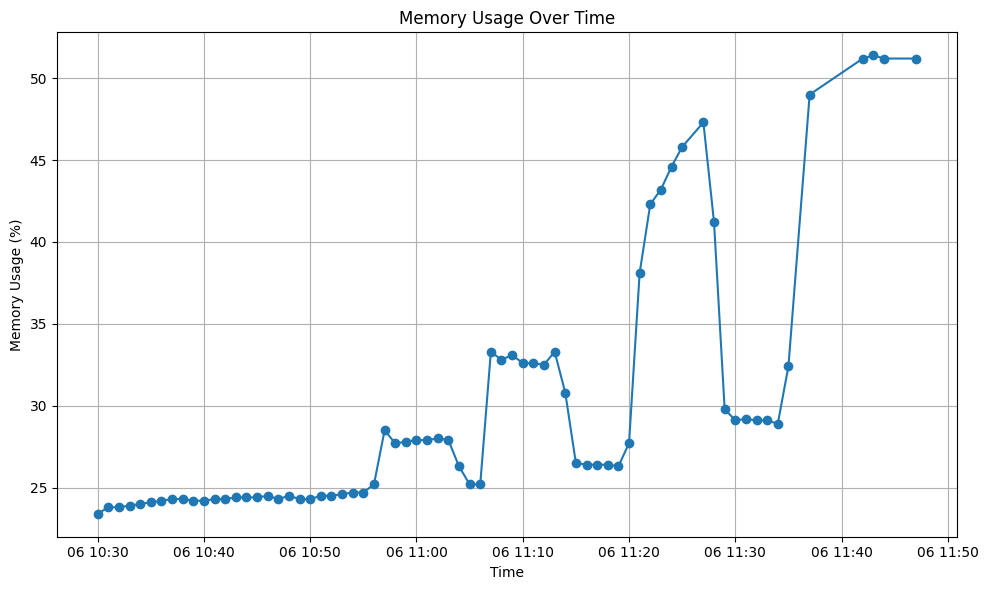

In [86]:

# Rename columns for ease of use
memory_usage.columns = ['Time', 'Memory_Usage']

# Convert Time columns to datetime and Memory_Usage to numeric
memory_usage['Time'] = pd.to_datetime(memory_usage['Time'])
memory_usage['Memory_Usage'] = memory_usage['Memory_Usage'].apply(lambda x: float(x.strip('%')))

# Plotting the corrected Memory Usage data
plt.figure(figsize=(10, 6))

plt.plot(memory_usage['Time'], memory_usage['Memory_Usage'], marker='o')
plt.title('Memory Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Memory Usage (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

KeyError: 'Request_Concurrency'

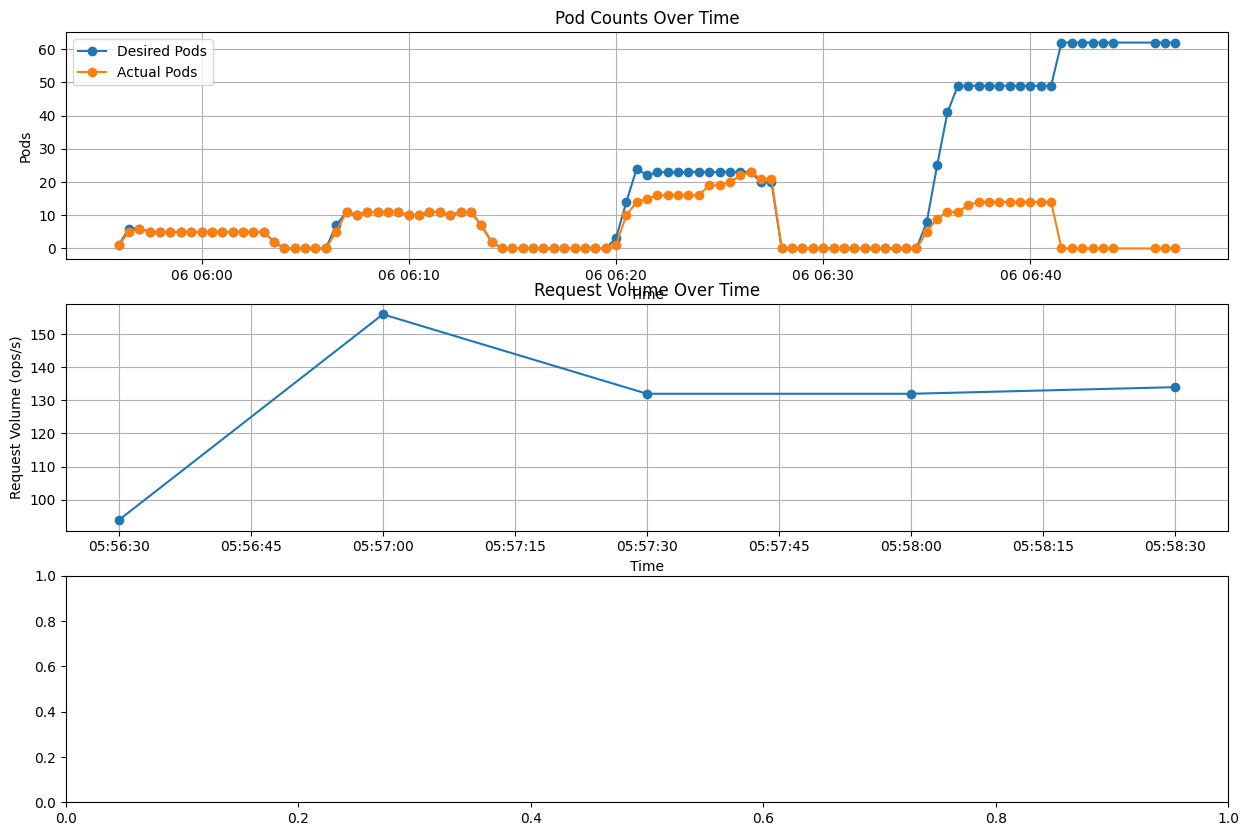

In [62]:
# Correcting the dataset definition for request_volume

request_volume = pd.DataFrame({
    'Time': ['2024-08-06 05:56:30', '2024-08-06 05:57:00', '2024-08-06 05:57:30', '2024-08-06 05:58:00', '2024-08-06 05:58:30'],
    'Request Volume': [93.8, 156, 132, 132, 134]
})

# Convert Time columns to datetime
pod_counts['Time'] = pd.to_datetime(pod_counts['Time'])
request_volume['Time'] = pd.to_datetime(request_volume['Time'])
request_concurrency['Time'] = pd.to_datetime(request_concurrency['Time'])

# Plotting the additional data
plt.figure(figsize=(15, 10))

# Pod Counts
plt.subplot(3, 1, 1)
plt.plot(pod_counts['Time'], pod_counts['Desired Pods'], marker='o', label='Desired Pods')
plt.plot(pod_counts['Time'], pod_counts['Actual Pods'], marker='o', label='Actual Pods')
plt.title('Pod Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Pods')
plt.legend()
plt.grid(True)

# Request Volume
plt.subplot(3, 1, 2)
plt.plot(request_volume['Time'], request_volume['Request Volume'], marker='o')
plt.title('Request Volume Over Time')
plt.xlabel('Time')
plt.ylabel('Request Volume (ops/s)')
plt.grid(True)

# Request Concurrency
plt.subplot(3, 1, 3)
plt.plot(request_concurrency['Time'], request_concurrency['Request_Concurrency'], marker='o')
plt.title('Request Concurrency Over Time')
plt.xlabel('Time')
plt.ylabel('Request Concurrency')
plt.grid(True)

plt.tight_layout()
plt.show()


                  Time  Memory_Usage
0  2024-08-06 10:30:00          23.4
1  2024-08-06 10:31:00          23.8
2  2024-08-06 10:32:00          23.8
3  2024-08-06 10:33:00          23.9
4  2024-08-06 10:34:00          24.0
..                 ...           ...
65 2024-08-06 11:37:00          49.0
66 2024-08-06 11:42:00          51.2
67 2024-08-06 11:43:00          51.4
68 2024-08-06 11:44:00          51.2
69 2024-08-06 11:47:00          51.2

[70 rows x 2 columns]


<module 'matplotlib.pyplot' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/matplotlib/pyplot.py'>

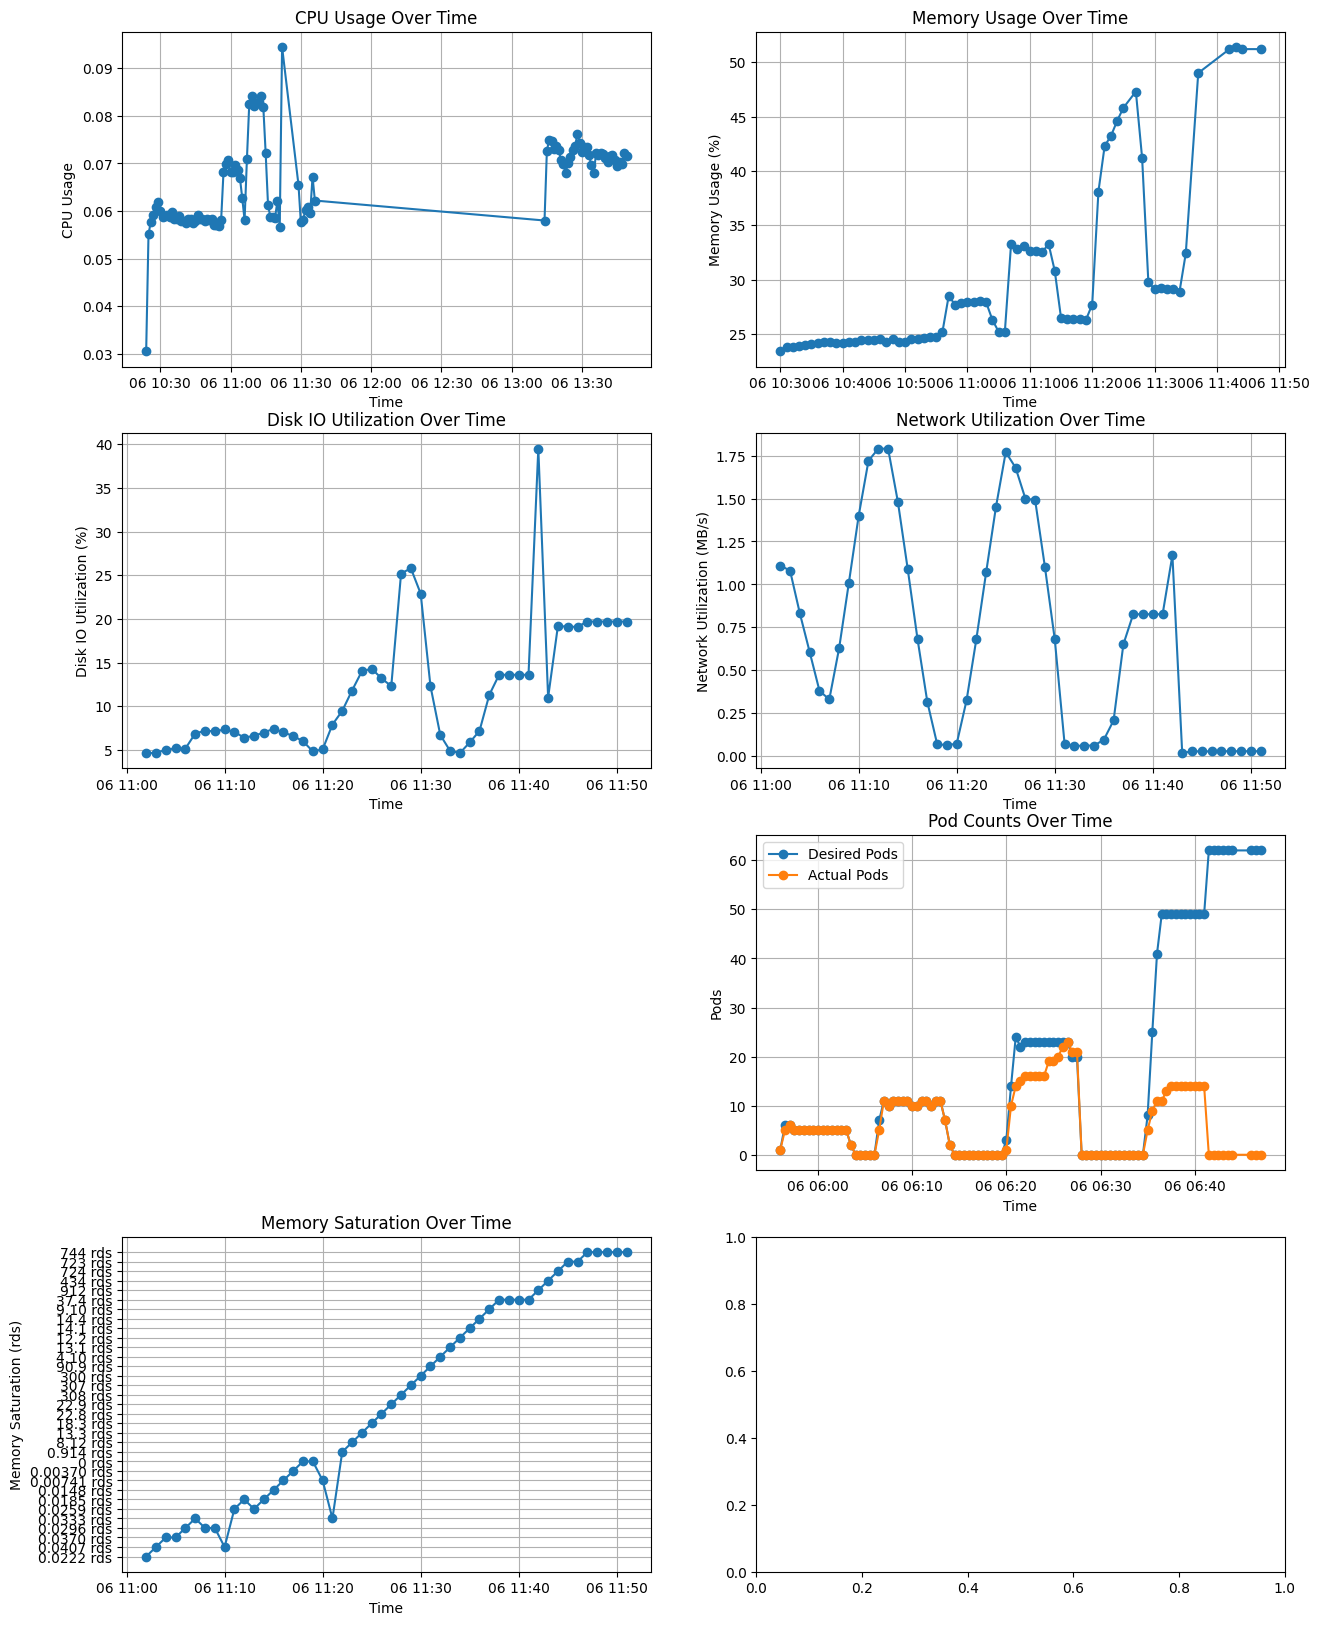

In [87]:
# Convert Time columns to datetime
cpu_usage['Time'] = pd.to_datetime(cpu_usage['Time'])
memory_usage['Time'] = pd.to_datetime(memory_usage['Time'])
disk_io_utilization['Time'] = pd.to_datetime(disk_io_utilization['Time'])
network_utilization['Time'] = pd.to_datetime(network_utilization['Time'])
response_time['Time'] = pd.to_datetime(response_time['Time'])
pod_counts['Time'] = pd.to_datetime(pod_counts['Time'])
request_volume['Time'] = pd.to_datetime(request_volume['Time'])
request_concurrency['Time'] = pd.to_datetime(request_concurrency['Time'])
memory_saturation['Time'] = pd.to_datetime(memory_saturation['Time'])
cpu_saturation['Time'] = pd.to_datetime(cpu_saturation['Time'])

# Convert memory usage and disk IO utilization to numeric values

memory_usage_values = []

# Loop through each value in the 'Memory_Usage' column\
print(memory_usage)
for x in memory_usage['Memory_Usage']:
    # Convert the value to string, strip the '%' sign, and convert to float
  
    value = float(str(x).strip('%'))
    # Append the converted value to the list
    memory_usage_values.append(value)

# Assign the list back to the 'Memory_Usage' column
memory_usage['Memory_Usage'] = memory_usage_values

disk_io_utilization['192.168.49.2:9100 sda'] = disk_io_utilization['192.168.49.2:9100 sda'].apply(lambda x: float(x.strip('%')))
network_utilization['192.168.49.2:9100 Receive'] = network_utilization['192.168.49.2:9100 Receive'].apply(
    lambda x: float(x.split()[0]) if 'MB/s' in x else float(x.split()[0]) / 1024
)

# Plotting the data
plt.figure(figsize=(15, 20))

# CPU Usage
plt.subplot(4, 2, 1)
plt.plot(cpu_usage['Time'], cpu_usage['192.168.49.2:10250'], marker='o')
plt.title('CPU Usage Over Time')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.grid(True)

# Memory Usage
plt.subplot(4, 2, 2)
plt.plot(memory_usage['Time'], memory_usage['Memory_Usage'], marker='o')
plt.title('Memory Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Memory Usage (%)')
plt.grid(True)

# Disk IO Utilization
plt.subplot(4, 2, 3)
plt.plot(disk_io_utilization['Time'], disk_io_utilization['192.168.49.2:9100 sda'], marker='o')
plt.title('Disk IO Utilization Over Time')
plt.xlabel('Time')
plt.ylabel('Disk IO Utilization (%)')
plt.grid(True)

# Network Utilization
plt.subplot(4, 2, 4)
plt.plot(network_utilization['Time'], network_utilization['192.168.49.2:9100 Receive'], marker='o')
plt.title('Network Utilization Over Time')
plt.xlabel('Time')
plt.ylabel('Network Utilization (MB/s)')
plt.grid(True)


# Pod Counts
plt.subplot(4, 2, 6)
plt.plot(pod_counts['Time'], pod_counts['Desired Pods'], marker='o', label='Desired Pods')
plt.plot(pod_counts['Time'], pod_counts['Actual Pods'], marker='o', label='Actual Pods')
plt.title('Pod Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Pods')
plt.legend()
plt.grid(True)

# Memory Saturation
plt.subplot(4, 2, 7)
plt.plot(memory_saturation['Time'], memory_saturation['192.168.49.2:9100'], marker='o')
plt.title('Memory Saturation Over Time')
plt.xlabel('Time')
plt.ylabel('Memory Saturation (rds)')
plt.grid(True)

# CPU Saturation
plt.subplot(4, 2, 8)
plt

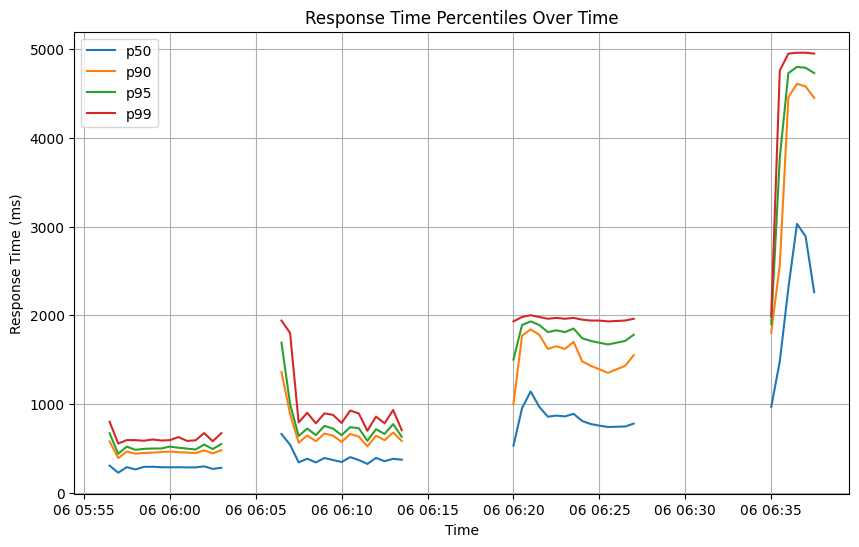

In [29]:
def convert_to_ms(value):
    if isinstance(value, str):
        if ' ms' in value:
            return float(value.replace(' ms', ''))
        elif ' s' in value:
            return float(value.replace(' s', '')) * 1000
    return float(value)

# Apply the conversion function to each column
response_time['00008 (p50)'] = response_time['00008 (p50)'].apply(convert_to_ms)
response_time['00008 (p90)'] = response_time['00008 (p90)'].apply(convert_to_ms)
response_time['00008 (p95)'] = response_time['00008 (p95)'].apply(convert_to_ms)
response_time['00008 (p99)'] = response_time['00008 (p99)'].apply(convert_to_ms)

plt.figure(figsize=(10, 6))
plt.plot(response_time['Time'], response_time['00008 (p50)'], label='p50')
plt.plot(response_time['Time'], response_time['00008 (p90)'], label='p90')
plt.plot(response_time['Time'], response_time['00008 (p95)'], label='p95')
plt.plot(response_time['Time'], response_time['00008 (p99)'], label='p99')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Response Time (ms)')
plt.title('Response Time Percentiles Over Time')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [30]:
print(merged_data.columns)
response_time.head

Index(['Time', '00008 (p50)', '00008 (p90)', '00008 (p95)', '00008 (p99)',
       '192.168.49.2:10250',
       '100 -\n(\n  avg(node_memory_MemAvailable_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""}) /\n  avg(node_memory_MemTotal_bytes{job="node-exporter", instance="192.168.49.2:9100", cluster=""})\n* 100\n)\n',
       '192.168.49.2:9100 sda', '192.168.49.2:9100 Receive', 'Desired Pods',
       'Actual Pods', '192.168.49.2:9100_x', '192.168.49.2:9100_y'],
      dtype='object')


<bound method NDFrame.head of                   Time  00008 (p50)  00008 (p90)  00008 (p95)  00008 (p99)
0  2024-08-06 05:56:30        304.0        577.0        669.0        798.0
1  2024-08-06 05:57:00        224.0        388.0        437.0        553.0
2  2024-08-06 05:57:30        287.0        464.0        518.0        592.0
3  2024-08-06 05:58:00        261.0        439.0        482.0        591.0
4  2024-08-06 05:58:30        290.0        446.0        493.0        585.0
..                 ...          ...          ...          ...          ...
83 2024-08-06 06:43:30          NaN          NaN          NaN          NaN
84 2024-08-06 06:44:00          NaN          NaN          NaN          NaN
85 2024-08-06 06:44:30          NaN          NaN          NaN          NaN
86 2024-08-06 06:46:30          NaN          NaN          NaN          NaN
87 2024-08-06 06:47:00          NaN          NaN          NaN          NaN

[88 rows x 5 columns]>

KeyError: 'Response Time'

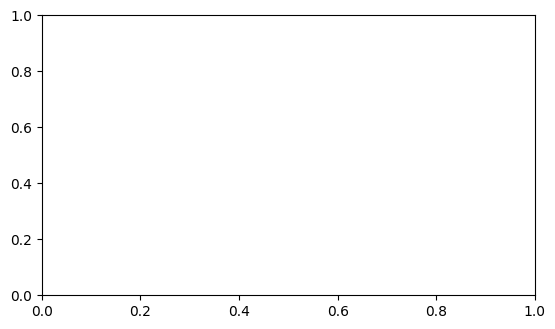

In [31]:
plt.figure(figsize=(14, 8))

# Subplot 1: CPU Usage vs Response Time
plt.subplot(2, 2, 1)
plt.scatter(merged_data['192.168.49.2:10250'], merged_data['Response Time'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

# Subplot 2: Memory Usage vs Response Time
plt.subplot(2, 2, 2)
plt.scatter(merged_data['Memory Usage'], merged_data['Response Time'], alpha=0.5)
plt.xlabel('Memory Usage (MiB)')
plt.ylabel('Response Time (ms)')
plt.title('Memory Usage vs Response Time')
plt.grid(True)

# Subplot 3: Disk I/O Utilization vs Response Time
plt.subplot(2, 2, 3)
plt.scatter(merged_data['Disk I/O Utilization'], merged_data['Response Time'], alpha=0.5)
plt.xlabel('Disk I/O Utilization')
plt.ylabel('Response Time (ms)')
plt.title('Disk I/O Utilization vs Response Time')
plt.grid(True)

# Subplot 4: Network Utilization vs Response Time
plt.subplot(2, 2, 4)
plt.scatter(merged_data['Bytes Transmitted'] + merged_data['Bytes Received'], merged_data['Response Time'], alpha=0.5)
plt.xlabel('Network Utilization (Bytes)')
plt.ylabel('Response Time (ms)')
plt.title('Network Utilization vs Response Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('fhir-fastapiapp/comprehensive_analysis_plots.png')
plt.show()

In [33]:
import pandas as pd

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for df in dataframes.values():
    df['Time'] = pd.to_datetime(df['Time'])

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')



TypeError: 'value' must be an instance of str or bytes, not a float

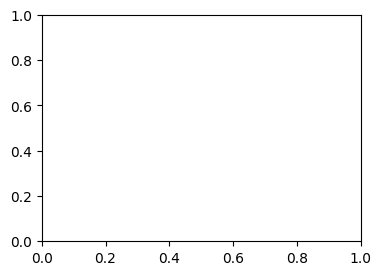

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 10))

# CPU Usage vs Response Time
plt.subplot(3, 3, 1)
plt.scatter(merged_data['192.168.49.2:10250_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

# Memory Usage vs Response Time
plt.subplot(3, 3, 2)
plt.scatter(merged_data['192.168.49.2:10250_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Memory Usage (MiB)')
plt.ylabel('Response Time (ms)')
plt.title('Memory Usage vs Response Time')
plt.grid(True)

# Disk I/O Utilization vs Response Time
plt.subplot(3, 3, 3)
plt.scatter(merged_data['192.168.49.2:9100 sda'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Disk I/O Utilization')
plt.ylabel('Response Time (ms)')
plt.title('Disk I/O Utilization vs Response Time')
plt.grid(True)

# Network Utilization vs Response Time
plt.subplot(3, 3, 4)
plt.scatter(merged_data['192.168.49.2:9100 Receive'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Network Utilization (Bytes)')
plt.ylabel('Response Time (ms)')
plt.title('Network Utilization vs Response Time')
plt.grid(True)

# Pod Counts vs Response Time
plt.subplot(3, 3, 5)
plt.scatter(merged_data['Actual Pods'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Pod Count')
plt.ylabel('Response Time (ms)')
plt.title('Pod Counts vs Response Time')
plt.grid(True)

# Memory Saturation vs Response Time
plt.subplot(3, 3, 6)
plt.scatter(merged_data['192.168.49.2:9100_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Major Page Faults')
plt.ylabel('Response Time (ms)')
plt.title('Memory Saturation vs Response Time')
plt.grid(True)

# CPU Saturation vs Response Time
plt.subplot(3, 3, 7)
plt.scatter(merged_data['192.168.49.2:9100_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Load1 per CPU')
plt.ylabel('Response Time (ms)')
plt.title('CPU Saturation vs Response Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('fhir-fastapiapp/comprehensive_analysis_plots.png')
plt.show()


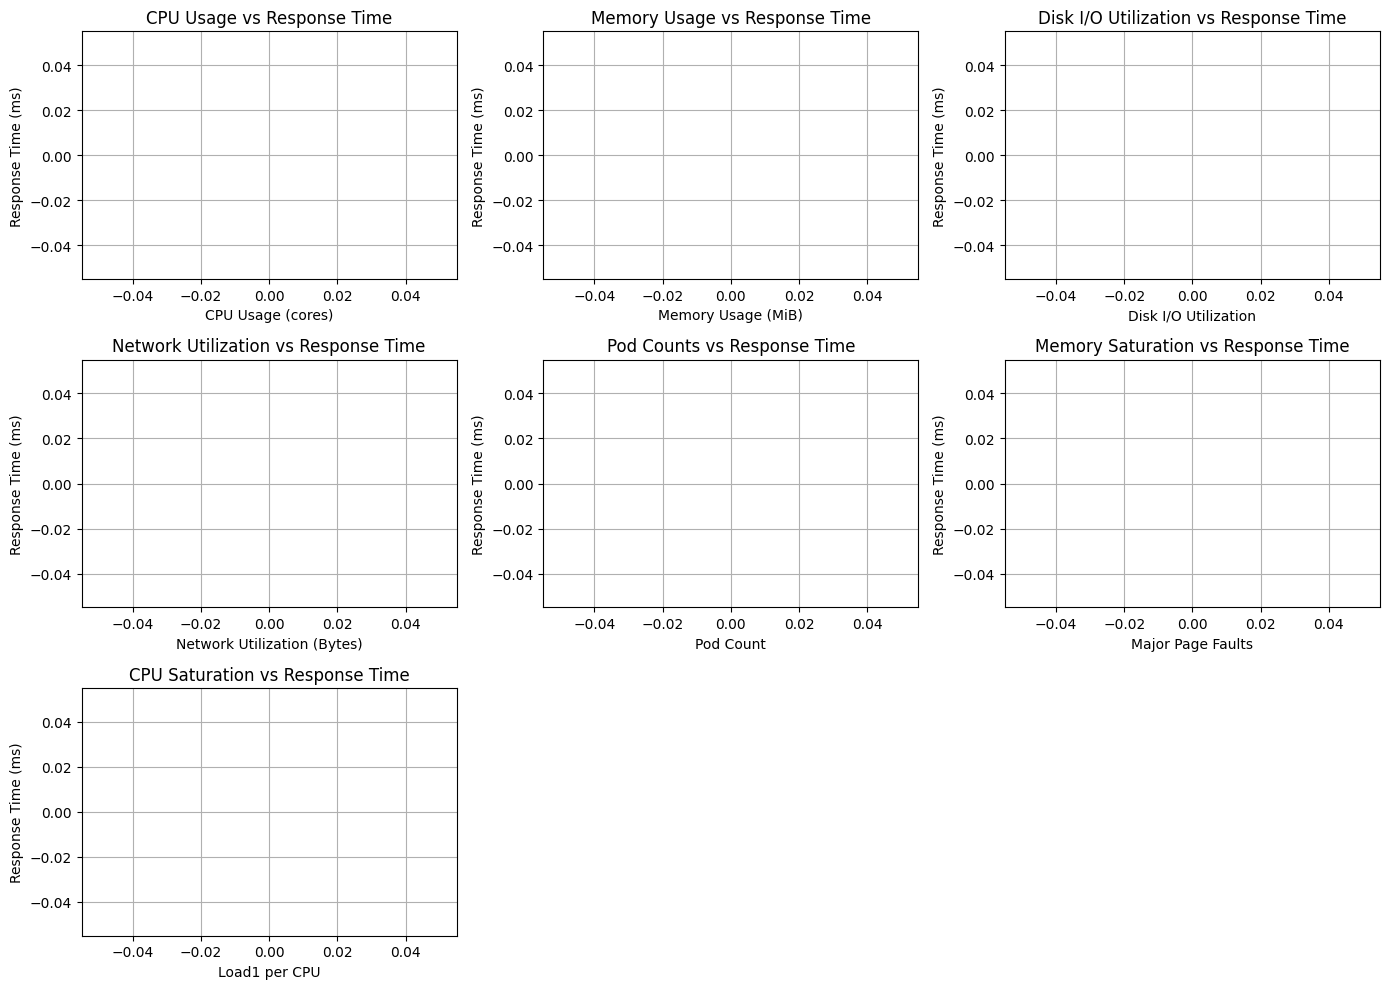

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for df in dataframes.values():
    df['Time'] = pd.to_datetime(df['Time'])

# Clean numeric columns
for name, df in dataframes.items():
    for col in df.columns:
        if col != 'Time':
            if df[col].dtype == 'object':
                df[col] = pd.to_numeric(df[col].str.replace(r'[^\d.]+', ''), errors='coerce')
            else:
                df[col] = pd.to_numeric(df[col], errors='coerce')

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')

# Drop rows with NaN values for the purpose of plotting
merged_data = merged_data.dropna()

# Create visualizations
plt.figure(figsize=(14, 10))

# CPU Usage vs Response Time
plt.subplot(3, 3, 1)
plt.scatter(merged_data['192.168.49.2:10250_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

# Memory Usage vs Response Time
plt.subplot(3, 3, 2)
plt.scatter(merged_data['192.168.49.2:10250_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Memory Usage (MiB)')
plt.ylabel('Response Time (ms)')
plt.title('Memory Usage vs Response Time')
plt.grid(True)

# Disk I/O Utilization vs Response Time
plt.subplot(3, 3, 3)
plt.scatter(merged_data['192.168.49.2:9100 sda'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Disk I/O Utilization')
plt.ylabel('Response Time (ms)')
plt.title('Disk I/O Utilization vs Response Time')
plt.grid(True)

# Network Utilization vs Response Time
plt.subplot(3, 3, 4)
plt.scatter(merged_data['192.168.49.2:9100 Receive'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Network Utilization (Bytes)')
plt.ylabel('Response Time (ms)')
plt.title('Network Utilization vs Response Time')
plt.grid(True)

# Pod Counts vs Response Time
plt.subplot(3, 3, 5)
plt.scatter(merged_data['Actual Pods'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Pod Count')
plt.ylabel('Response Time (ms)')
plt.title('Pod Counts vs Response Time')
plt.grid(True)

# Memory Saturation vs Response Time
plt.subplot(3, 3, 6)
plt.scatter(merged_data['192.168.49.2:9100_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Major Page Faults')
plt.ylabel('Response Time (ms)')
plt.title('Memory Saturation vs Response Time')
plt.grid(True)

# CPU Saturation vs Response Time
plt.subplot(3, 3, 7)
plt.scatter(merged_data['192.168.49.2:9100_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Load1 per CPU')
plt.ylabel('Response Time (ms)')
plt.title('CPU Saturation vs Response Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('fhir-fastapiapp/comprehensive_analysis_plots.png')
plt.show()


In [40]:
merged_data.head

<bound method NDFrame.head of Empty DataFrame
Columns: [Time, 00008 (p50), 00008 (p90), 00008 (p95), 00008 (p99), 192.168.49.2:10250_x, 192.168.49.2:10250_y, 192.168.49.2:9100 sda, 192.168.49.2:9100 Receive, Desired Pods, Actual Pods, 192.168.49.2:9100_x, 192.168.49.2:9100_y]
Index: []>

In [42]:
merged_data['192.168.49.2:10250_x']

Series([], Name: 192.168.49.2:10250_x, dtype: float64)

In [43]:
merged_data.shape

(0, 13)

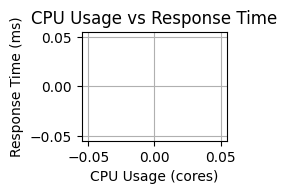

In [41]:
# CPU Usage vs Response Time
plt.subplot(3, 3, 1)
plt.scatter(merged_data['192.168.49.2:10250_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

In [45]:
import pandas as pd

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for name, df in dataframes.items():
    df['Time'] = pd.to_datetime(df['Time'])
    print(f"\n{name} dataset after parsing 'Time' column:")
    print(df.head())

# Clean numeric columns
for name, df in dataframes.items():
    for col in df.columns:
        if col != 'Time':
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^\d.]+', ''), errors='coerce')

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')

# Check the merged data
print("\nMerged DataFrame:")
print(merged_data.head())
print(merged_data.shape)



cpu_usage dataset after parsing 'Time' column:
                 Time  192.168.49.2:10250
0 2024-08-06 10:24:00              0.0305
1 2024-08-06 10:25:00              0.0552
2 2024-08-06 10:26:00              0.0577
3 2024-08-06 10:27:00              0.0591
4 2024-08-06 10:28:00              0.0609

memory_usage dataset after parsing 'Time' column:
                 Time 192.168.49.2:10250
0 2024-08-06 10:24:00            112 MiB
1 2024-08-06 10:25:00            116 MiB
2 2024-08-06 10:26:00            118 MiB
3 2024-08-06 10:27:00            121 MiB
4 2024-08-06 10:28:00            119 MiB

disk_io_utilization dataset after parsing 'Time' column:
                 Time 192.168.49.2:9100 sda
0 2024-08-06 11:02:00                 4.64%
1 2024-08-06 11:03:00                 4.65%
2 2024-08-06 11:04:00                 5.02%
3 2024-08-06 11:05:00                 5.18%
4 2024-08-06 11:06:00                 5.15%

network_utilization dataset after parsing 'Time' column:
                 Time 1


cpu_usage dataset after parsing 'Time' column:
                 Time  192.168.49.2:10250
0 2024-08-06 10:24:00              0.0305
1 2024-08-06 10:25:00              0.0552
2 2024-08-06 10:26:00              0.0577
3 2024-08-06 10:27:00              0.0591
4 2024-08-06 10:28:00              0.0609

memory_usage dataset after parsing 'Time' column:
                 Time 192.168.49.2:10250
0 2024-08-06 10:24:00            112 MiB
1 2024-08-06 10:25:00            116 MiB
2 2024-08-06 10:26:00            118 MiB
3 2024-08-06 10:27:00            121 MiB
4 2024-08-06 10:28:00            119 MiB

disk_io_utilization dataset after parsing 'Time' column:
                 Time 192.168.49.2:9100 sda
0 2024-08-06 11:02:00                 4.64%
1 2024-08-06 11:03:00                 4.65%
2 2024-08-06 11:04:00                 5.02%
3 2024-08-06 11:05:00                 5.18%
4 2024-08-06 11:06:00                 5.15%

network_utilization dataset after parsing 'Time' column:
                 Time 1

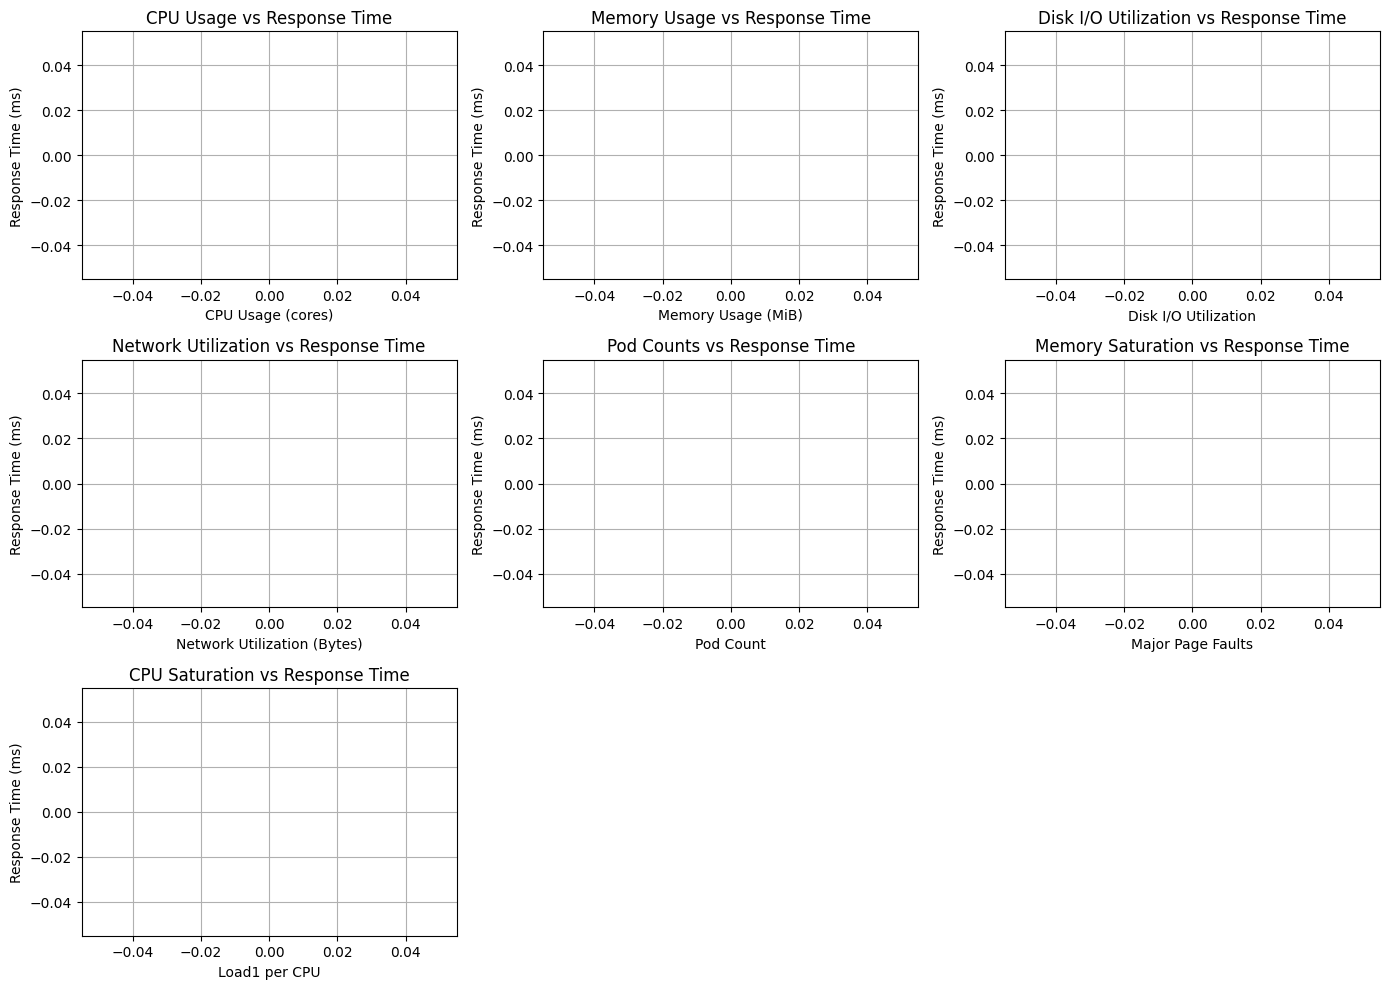

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
datasets = {
    "cpu_usage": "fhir-fastapiapp/CPU usage-data-2024-08-06 08_49_17.csv",
    "memory_usage": "fhir-fastapiapp/Memory-data-2024-08-06 08_49_10.csv",
    "disk_io_utilization": "fhir-fastapiapp/Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "network_utilization": "fhir-fastapiapp/Network Utilisation (Bytes Receive_Transmit)-data-2024-08-06 08_32_50.csv",
    "response_time": "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv",
    "pod_counts": "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv",
    "memory_saturation": "fhir-fastapiapp/Memory Saturation (Major Page Faults)-data-2024-08-06 08_32_43.csv",
    "cpu_saturation": "fhir-fastapiapp/CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv"
}

# Load data into DataFrames
dataframes = {name: pd.read_csv(path) for name, path in datasets.items()}

# Convert 'Time' columns to datetime
for name, df in dataframes.items():
    df['Time'] = pd.to_datetime(df['Time'])
    print(f"\n{name} dataset after parsing 'Time' column:")
    print(df.head())

# Clean numeric columns
for name, df in dataframes.items():
    for col in df.columns:
        if col != 'Time':
            df[col] = pd.to_numeric(df[col].astype(str).str.replace(r'[^\d.]+', ''), errors='coerce')

# Merge dataframes on 'Time'
merged_data = dataframes['response_time']
for name, df in dataframes.items():
    if name != 'response_time':
        merged_data = pd.merge_asof(merged_data.sort_values('Time'), df.sort_values('Time'), on='Time')


# Create visualizations
plt.figure(figsize=(14, 10))

# CPU Usage vs Response Time
plt.subplot(3, 3, 1)
plt.scatter(merged_data['192.168.49.2:10250_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('CPU Usage (cores)')
plt.ylabel('Response Time (ms)')
plt.title('CPU Usage vs Response Time')
plt.grid(True)

# Memory Usage vs Response Time
plt.subplot(3, 3, 2)
plt.scatter(merged_data['192.168.49.2:10250_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Memory Usage (MiB)')
plt.ylabel('Response Time (ms)')
plt.title('Memory Usage vs Response Time')
plt.grid(True)

# Disk I/O Utilization vs Response Time
plt.subplot(3, 3, 3)
plt.scatter(merged_data['192.168.49.2:9100 sda'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Disk I/O Utilization')
plt.ylabel('Response Time (ms)')
plt.title('Disk I/O Utilization vs Response Time')
plt.grid(True)

# Network Utilization vs Response Time
plt.subplot(3, 3, 4)
plt.scatter(merged_data['192.168.49.2:9100 Receive'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Network Utilization (Bytes)')
plt.ylabel('Response Time (ms)')
plt.title('Network Utilization vs Response Time')
plt.grid(True)

# Pod Counts vs Response Time
plt.subplot(3, 3, 5)
plt.scatter(merged_data['Actual Pods'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Pod Count')
plt.ylabel('Response Time (ms)')
plt.title('Pod Counts vs Response Time')
plt.grid(True)

# Memory Saturation vs Response Time
plt.subplot(3, 3, 6)
plt.scatter(merged_data['192.168.49.2:9100_x'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Major Page Faults')
plt.ylabel('Response Time (ms)')
plt.title('Memory Saturation vs Response Time')
plt.grid(True)

# CPU Saturation vs Response Time
plt.subplot(3, 3, 7)
plt.scatter(merged_data['192.168.49.2:9100_y'], merged_data['00008 (p50)'], alpha=0.5)
plt.xlabel('Load1 per CPU')
plt.ylabel('Response Time (ms)')
plt.title('CPU Saturation vs Response Time')
plt.grid(True)

plt.tight_layout()
plt.savefig('fhir-fastapiapp/comprehensive_analysis_plots.png')
plt.show()


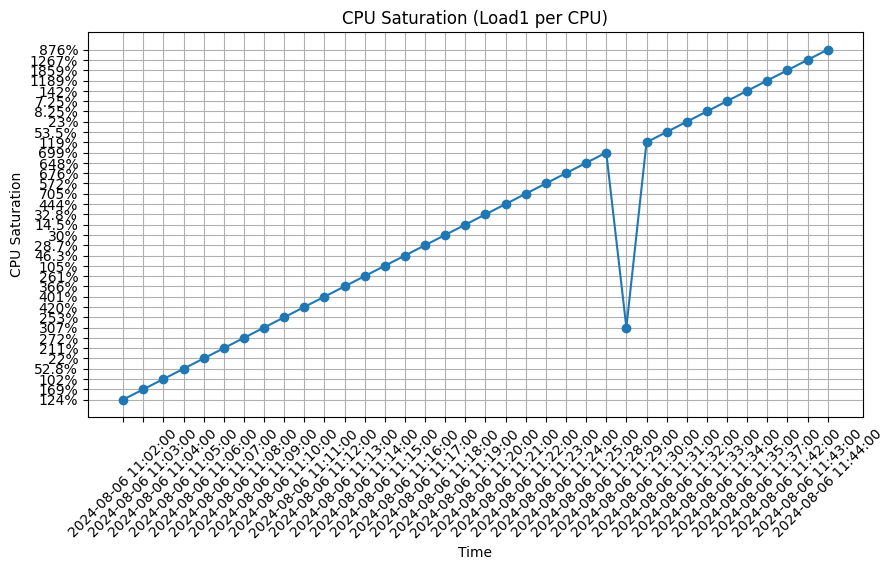

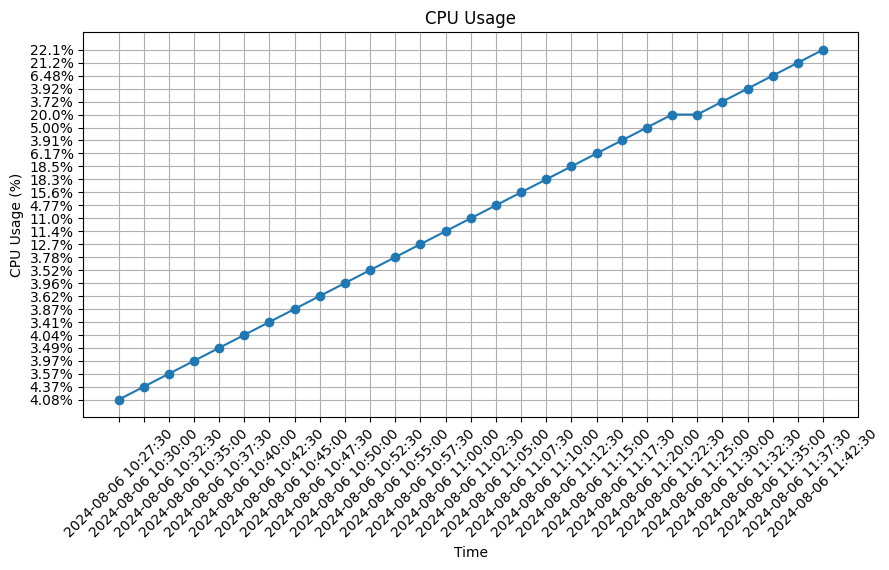

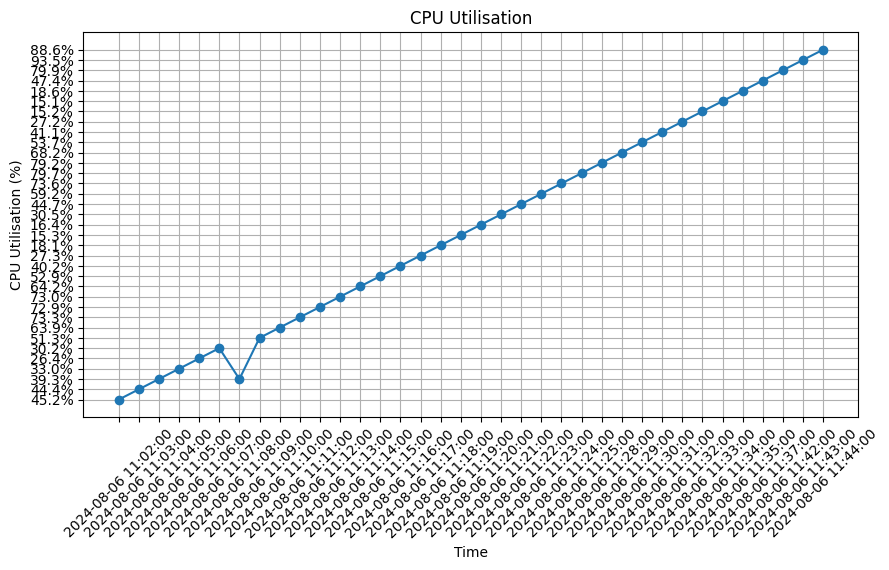

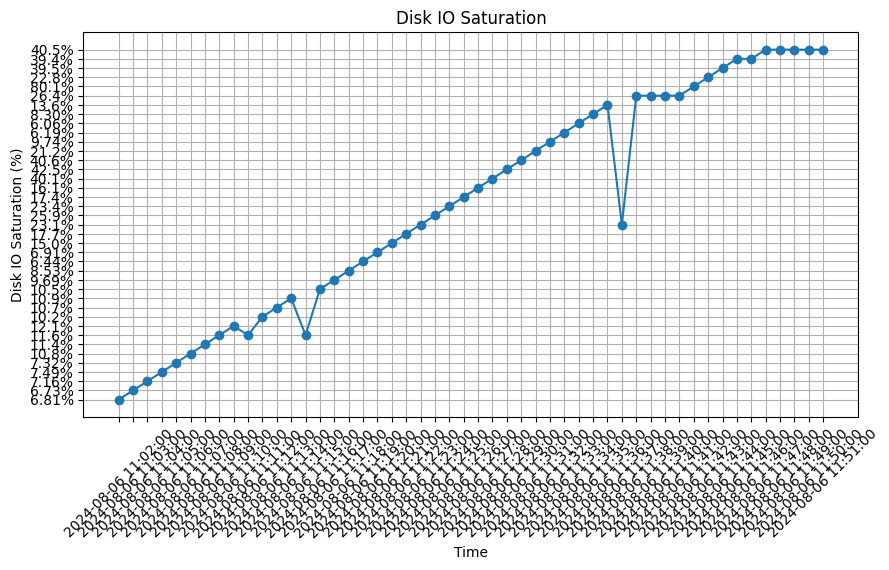

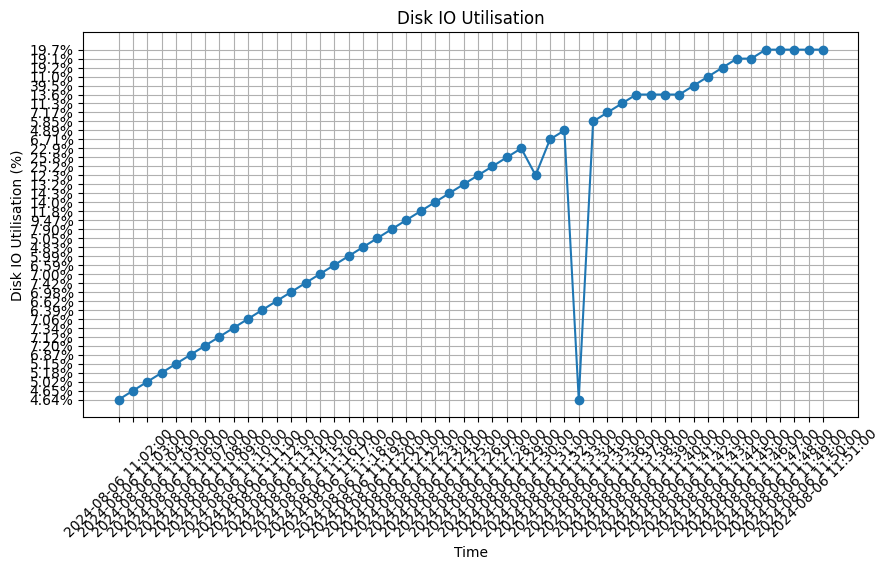

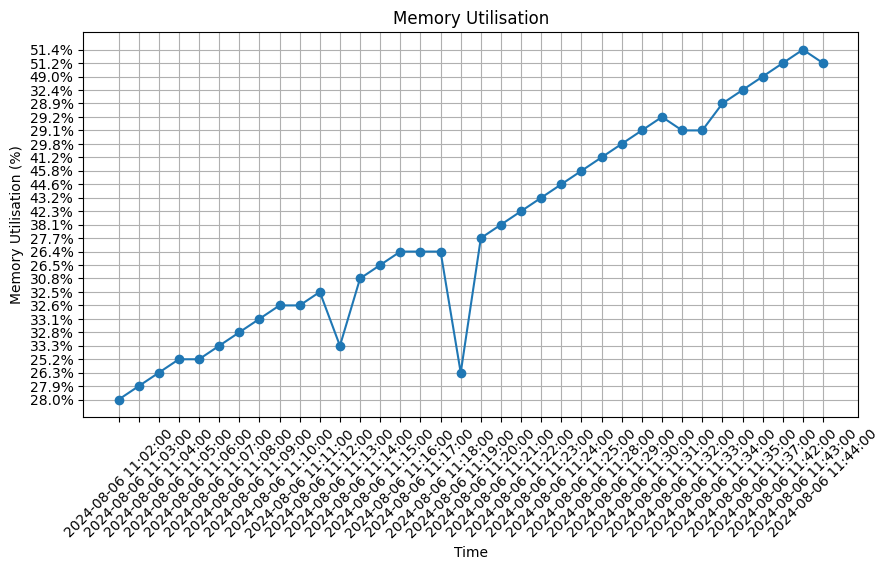

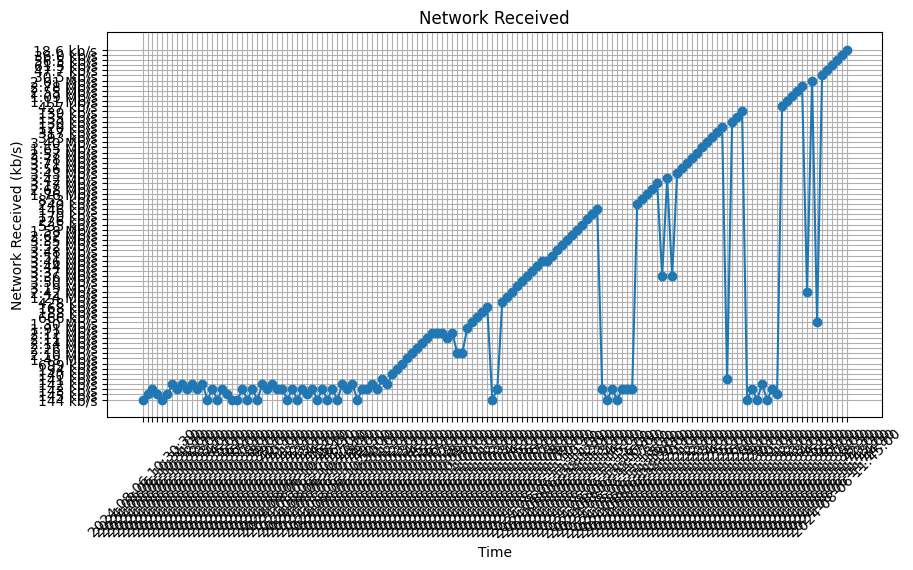

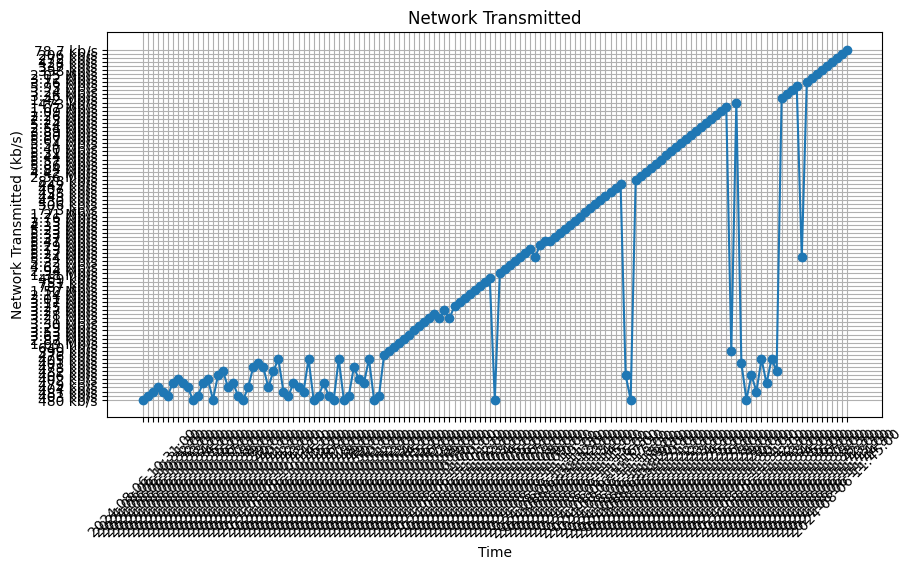

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the file path prefix
file_path_prefix = "fhir-fastapiapp/"

# List of CSV files with updated paths
csv_files = {
    "CPU_Saturation": f"{file_path_prefix}CPU Saturation (Load1 per CPU)-data-2024-08-06 08_32_33.csv",
    "CPU_Usage": f"{file_path_prefix}CPU Usage-data-2024-08-06 08_30_16.csv",
    "CPU_Utilisation": f"{file_path_prefix}CPU Utilisation-data-2024-08-06 08_32_27.csv",
    "Disk_IO_Saturation": f"{file_path_prefix}Disk IO Saturation-data-2024-08-06 08_33_04.csv",
    "Disk_IO_Utilisation": f"{file_path_prefix}Disk IO Utilisation-data-2024-08-06 08_32_59.csv",
    "Memory_Utilisation": f"{file_path_prefix}Memory Utilisation-data-2024-08-06 08_32_38.csv",
    "Network_Received": f"{file_path_prefix}Network Received-data-as-joinbyfield-2024-08-06 08_31_05.csv",
    "Network_Transmitted": f"{file_path_prefix}Network Transmitted-data-as-joinbyfield-2024-08-06 08_31_26.csv",
}

# Function to read CSV files into DataFrames
def read_csv_files(file_paths):
    dataframes = {}
    for key, file in file_paths.items():
        try:
            df = pd.read_csv(file)
            dataframes[key] = df
        except Exception as e:
            print(f"Error reading {file}: {e}")
    return dataframes

# Read the CSV files
dataframes = read_csv_files(csv_files)

# Plotting function
def plot_data(df, x_col, y_col, title, xlabel, ylabel):
    plt.figure(figsize=(10, 5))
    plt.plot(df[x_col], df[y_col], marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# Plotting CPU Saturation
plot_data(dataframes["CPU_Saturation"], "Time", "192.168.49.2:9100", "CPU Saturation (Load1 per CPU)", "Time", "CPU Saturation")

# Plotting CPU Usage
plot_data(dataframes["CPU_Usage"], "Time", "0", "CPU Usage", "Time", "CPU Usage (%)")

# Plotting CPU Utilisation
plot_data(dataframes["CPU_Utilisation"], "Time", "192.168.49.2:9100", "CPU Utilisation", "Time", "CPU Utilisation (%)")

# Plotting Disk IO Saturation
plot_data(dataframes["Disk_IO_Saturation"], "Time", "192.168.49.2:9100 sda", "Disk IO Saturation", "Time", "Disk IO Saturation (%)")

# Plotting Disk IO Utilisation
plot_data(dataframes["Disk_IO_Utilisation"], "Time", "192.168.49.2:9100 sda", "Disk IO Utilisation", "Time", "Disk IO Utilisation (%)")

# Plotting Memory Utilisation
plot_data(dataframes["Memory_Utilisation"], "Time", "192.168.49.2:9100", "Memory Utilisation", "Time", "Memory Utilisation (%)")

# Plotting Network Received
plot_data(dataframes["Network_Received"], "Time", "bridge", "Network Received", "Time", "Network Received (kb/s)")

# Plotting Network Transmitted
plot_data(dataframes["Network_Transmitted"], "Time", "bridge", "Network Transmitted", "Time", "Network Transmitted (kb/s)")


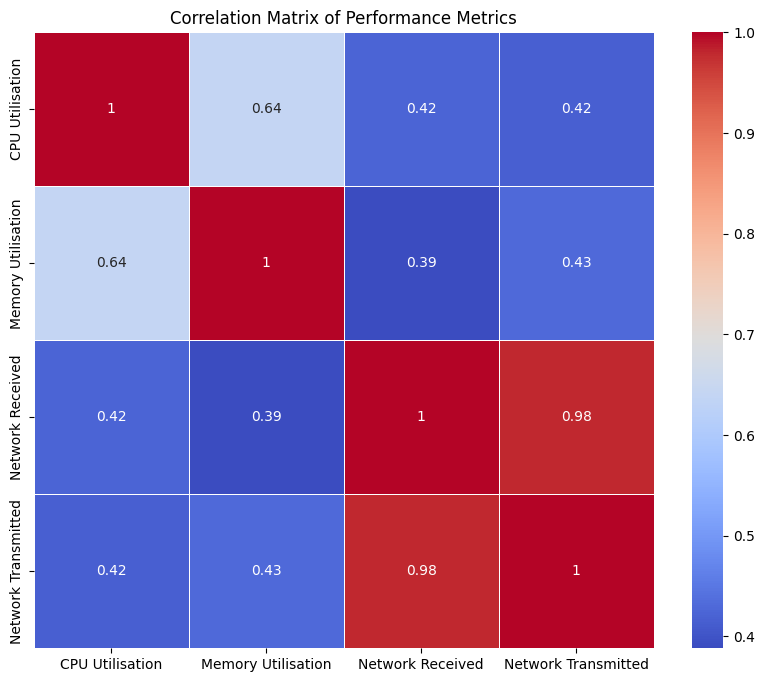

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Merging DataFrames on Time for correlation analysis
merged_df = dataframes["CPU_Utilisation"][["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "CPU Utilisation"})
merged_df = merged_df.merge(dataframes["Memory_Utilisation"][["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "Memory Utilisation"}), on="Time")
merged_df = merged_df.merge(dataframes["Network_Received"][["Time", "bridge"]].rename(columns={"bridge": "Network Received"}), on="Time")
merged_df = merged_df.merge(dataframes["Network_Transmitted"][["Time", "bridge"]].rename(columns={"bridge": "Network Transmitted"}), on="Time")

# Converting percentage strings to numeric
merged_df["CPU Utilisation"] = merged_df["CPU Utilisation"].str.rstrip('%').astype('float') / 100.0
merged_df["Memory Utilisation"] = merged_df["Memory Utilisation"].str.rstrip('%').astype('float') / 100.0

# Convert Network usage to numeric
def convert_to_kbps(value):
    value = value.lower().replace('b/s', '').strip()
    if 'm' in value:
        return float(value.replace('m', '').strip()) * 1000
    elif 'k' in value:
        return float(value.replace('k', '').strip())
    else:
        return float(value)

merged_df["Network Received"] = merged_df["Network Received"].apply(convert_to_kbps)
merged_df["Network Transmitted"] = merged_df["Network Transmitted"].apply(convert_to_kbps)

# Converting Time to datetime
merged_df["Time"] = pd.to_datetime(merged_df["Time"])

# Dropping the Time column for correlation analysis
correlation_data = merged_df.drop(columns=["Time"])

# Plotting correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = correlation_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Performance Metrics")
plt.show()


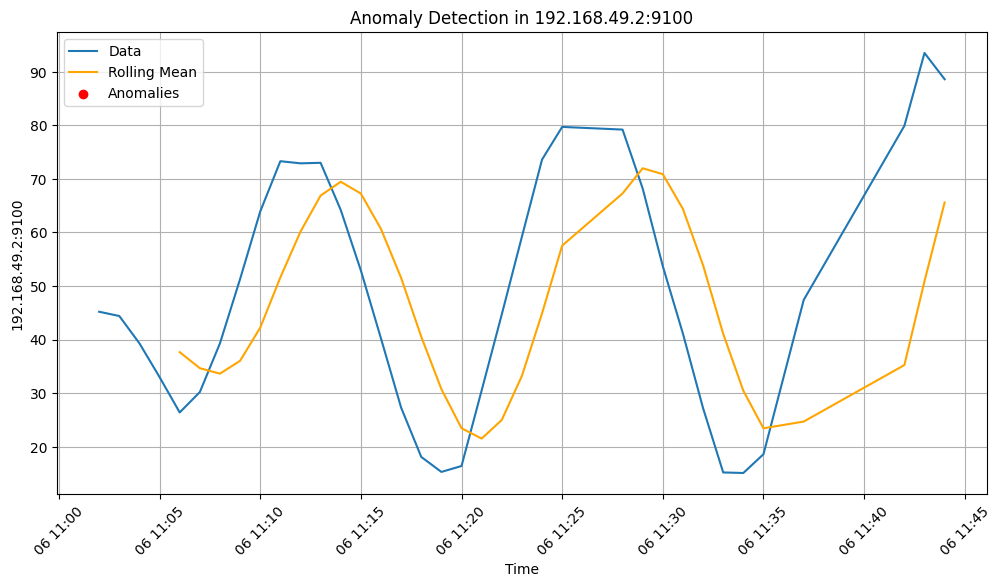

In [13]:
def plot_with_anomalies(df, column, window, threshold):
    df["rolling_mean"] = df[column].rolling(window=window).mean()
    df["anomaly"] = (df[column] - df["rolling_mean"]).abs() > threshold * df[column].std()

    plt.figure(figsize=(12, 6))
    plt.plot(df["Time"], df[column], label='Data')
    plt.plot(df["Time"], df["rolling_mean"], color='orange', label='Rolling Mean')
    plt.scatter(df["Time"][df["anomaly"]], df[column][df["anomaly"]], color='red', label='Anomalies')
    plt.title(f"Anomaly Detection in {column}")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

# Detect anomalies in CPU Utilisation
cpu_util_df = dataframes["CPU_Utilisation"]
cpu_util_df["192.168.49.2:9100"] = cpu_util_df["192.168.49.2:9100"].str.rstrip('%').astype('float')
cpu_util_df["Time"] = pd.to_datetime(cpu_util_df["Time"])
plot_with_anomalies(cpu_util_df, "192.168.49.2:9100", window=5, threshold=2)


In [20]:
request_volume_df

,Time,"round(sum(rate(activator_request_count{namespace_name=""default"", revision_name=~""fastapi-app-00008"", configuration_name=~""fastapi-app""}[1m])), 0.001)"
0,2024-08-06 05:56:30,93.8 ops/s
1,2024-08-06 05:57:00,156 ops/s
2,2024-08-06 05:57:30,132 ops/s
3,2024-08-06 05:58:00,132 ops/s
4,2024-08-06 05:58:30,134 ops/s
...,...,...
83,2024-08-06 06:43:30,0 ops/s
84,2024-08-06 06:44:00,0 ops/s
85,2024-08-06 06:44:30,0 ops/s
86,2024-08-06 06:46:30,0 ops/s


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the request volume CSV file
request_volume_file = "fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv"
request_volume_df = pd.read_csv(request_volume_file)

# Inspect the columns to determine the correct column name
print(request_volume_df.columns)

# Assuming you have request count data to represent load
# Adjust the column name based on what you see in the print output
load_df = request_volume_df[["Time", "round(sum(rate(activator_request_count{namespace_name='default', revision_name=~'fastapi-app-00008', configuration_name=~'fastapi-app'}[1m])), 0.001)"]].rename(columns={"round(sum(rate(activator_request_count{namespace_name='default', revision_name=~'fastapi-app-00008', configuration_name=~'fastapi-app'}[1m])), 0.001)": "Request Rate"})

# Merge load data with performance metrics
performance_load_df = merged_df.merge(load_df, on="Time")

# Plot load vs. CPU and Memory Utilisation
plt.figure(figsize=(12, 6))
plt.plot(performance_load_df["Time"], performance_load_df["Request Rate"], label="Request Rate (ops/s)", color="blue")
plt.plot(performance_load_df["Time"], performance_load_df["CPU Utilisation"], label="CPU Utilisation", color="green")
plt.plot(performance_load_df["Time"], performance_load_df["Memory Utilisation"], label="Memory Utilisation", color="red")
plt.title("Load vs. CPU and Memory Utilisation")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Index(['Time', 'round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)'], dtype='object')


KeyError: '["round(sum(rate(activator_request_count{namespace_name=\'default\', revision_name=~\'fastapi-app-00008\', configuration_name=~\'fastapi-app\'}[1m])), 0.001)"] not in index'

In [ ]:

# Convert Time columns to datetime
cpu_usage['Time'] = pd.to_datetime(cpu_usage['Time'])
memory_usage['Time'] = pd.to_datetime(memory_usage['Time'])
disk_io_utilization['Time'] = pd.to_datetime(disk_io_utilization['Time'])
network_utilization['Time'] = pd.to_datetime(network_utilization['Time'])
response_time['Time'] = pd.to_datetime(response_time['Time'])
pod_counts['Time'] = pd.to_datetime(pod_counts['Time'])
memory_saturation['Time'] = pd.to_datetime(memory_saturation['Time'])
cpu_saturation['Time'] = pd.to_datetime(cpu_saturation['Time'])

# Convert memory usage and disk IO utilization to numeric values
memory_usage['192.168.49.2:10250'] = memory_usage['192.168.49.2:10250'].apply(lambda x: float(x.split()[0]))
disk_io_utilization['192.168.49.2:9100 sda'] = disk_io_utilization['192.168.49.2:9100 sda'].apply(lambda x: float(x.strip('%')))
network_utilization['192.168.49.2:9100 Receive'] = network_utilization['192.168.49.2:9100 Receive'].apply(
    lambda x: float(x.split()[0]) if 'MB/s' in x else float(x.split()[0]) / 1024
)

# Plotting the data
plt.figure(figsize=(15, 20))

# CPU Usage
plt.subplot(4, 2, 1)
plt.plot(cpu_usage['Time'], cpu_usage['192.168.49.2:10250'], marker='o')
plt.title('CPU Usage Over Time')
plt.xlabel('Time')
plt.ylabel('CPU Usage')
plt.grid(True)

# Memory Usage
plt.subplot(4, 2, 2)
plt.plot(memory_usage['Time'], memory_usage['192.168.49.2:10250'], marker='o')
plt.title('Memory Usage Over Time')
plt.xlabel('Time')
plt.ylabel('Memory Usage (MiB)')
plt.grid(True)

# Disk IO Utilization
plt.subplot(4, 2, 3)
plt.plot(disk_io_utilization['Time'], disk_io_utilization['192.168.49.2:9100 sda'], marker='o')
plt.title('Disk IO Utilization Over Time')
plt.xlabel('Time')
plt.ylabel('Disk IO Utilization (%)')
plt.grid(True)

# Network Utilization
plt.subplot(4, 2, 4)
plt.plot(network_utilization['Time'], network_utilization['192.168.49.2:9100 Receive'], marker='o')
plt.title('Network Utilization Over Time')
plt.xlabel('Time')
plt.ylabel('Network Utilization (MB/s)')
plt.grid(True)

# Response Time
plt.subplot(4, 2, 5)
plt.plot(response_time['Time'], response_time['Response Time'], marker='o')
plt.title('Response Time Over Time')
plt.xlabel('Time')
plt.ylabel('Response Time (ms)')
plt.grid(True)

# Pod Counts
plt.subplot(4, 2, 6)
plt.plot(pod_counts['Time'], pod_counts['Desired Pods'], marker='o', label='Desired Pods')
plt.plot(pod_counts['Time'], pod_counts['Actual Pods'], marker='o', label='Actual Pods')
plt.title('Pod Counts Over Time')
plt.xlabel('Time')
plt.ylabel('Pods')
plt.legend()
plt.grid(True)

# Memory Saturation
plt.subplot(4, 2, 7)
plt.plot(memory_saturation['Time'], memory_saturation['192.168.49.2:9100'], marker='o')
plt.title('Memory Saturation Over Time')
plt.xlabel('Time')
plt.ylabel('Memory Saturation (rds)')
plt.grid(True)

# CPU Saturation
plt.subplot(4, 2, 8)
plt.plot(cpu_saturation['Time'], cpu_saturation['192.168.49.2:9100'], marker='o')
plt.title('CPU Saturation Over Time')
plt.xlabel('Time')
plt.ylabel('CPU Saturation (%)')
plt.grid(True)

plt.tight_layout()
plt.show()

KeyError: '192.168.49.2:10250'

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV files
cpu_utilisation_file = "fhir-fastapiapp/CPU Utilisation-data-2024-08-06 08_32_27.csv"
memory_utilisation_file = "fhir-fastapiapp/Memory Utilisation-data-2024-08-06 08_32_38.csv"
network_received_file = "fhir-fastapiapp/Network Received-data-as-joinbyfield-2024-08-06 08_31_05.csv"
network_transmitted_file = "fhir-fastapiapp/Network Transmitted-data-as-joinbyfield-2024-08-06 08_31_26.csv"
request_volume_file = "fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv"

# Load the data into DataFrames
cpu_utilisation_df = pd.read_csv(cpu_utilisation_file)
memory_utilisation_df = pd.read_csv(memory_utilisation_file)
network_received_df = pd.read_csv(network_received_file)
network_transmitted_df = pd.read_csv(network_transmitted_file)
request_volume_df = pd.read_csv(request_volume_file)

# Inspect the columns of request_volume_df
print(request_volume_df.columns)

# Define the correct column name for the request rate
request_rate_column = 'round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)'

# Prepare the load_df DataFrame
load_df = request_volume_df[["Time", request_rate_column]].rename(columns={request_rate_column: "Request Rate"})

# Merge dataframes on Time for the performance analysis
merged_df = cpu_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "CPU Utilisation"})
merged_df = merged_df.merge(memory_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "Memory Utilisation"}), on="Time")
merged_df = merged_df.merge(network_received_df[["Time", "bridge"]].rename(columns={"bridge": "Network Received"}), on="Time")
merged_df = merged_df.merge(network_transmitted_df[["Time", "bridge"]].rename(columns={"bridge": "Network Transmitted"}), on="Time")





# Inspect the data to ensure it is loaded correctly
print("CPU Utilisation DataFrame:")
print(cpu_utilisation_df.head())
print("\nMemory Utilisation DataFrame:")
print(memory_utilisation_df.head())
print("\nNetwork Received DataFrame:")
print(network_received_df.head())
print("\nNetwork Transmitted DataFrame:")
print(network_transmitted_df.head())
print("\nRequest Volume DataFrame:")
print(request_volume_df.head())
# Check the data types to ensure Time is datetime and other columns are numeric
print("\nData Types:")
print(cpu_utilisation_df.dtypes)
print(memory_utilisation_df.dtypes)
print(network_received_df.dtypes)
print(network_transmitted_df.dtypes)
print(request_volume_df.dtypes)


# Convert Time columns to datetime
cpu_utilisation_df["Time"] = pd.to_datetime(cpu_utilisation_df["Time"])
memory_utilisation_df["Time"] = pd.to_datetime(memory_utilisation_df["Time"])
network_received_df["Time"] = pd.to_datetime(network_received_df["Time"])
network_transmitted_df["Time"] = pd.to_datetime(network_transmitted_df["Time"])
request_volume_df["Time"] = pd.to_datetime(request_volume_df["Time"])

# Convert percentage strings to numeric
cpu_utilisation_df["192.168.49.2:9100"] = cpu_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0
memory_utilisation_df["192.168.49.2:9100"] = memory_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0

# Convert Request Rate from 'ops/s' to numeric
request_rate_column = 'round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)'
request_volume_df[request_rate_column] = request_volume_df[request_rate_column].str.replace(' ops/s', '').astype(float)

# Merge load data with performance metrics
performance_load_df = merged_df.merge(load_df, on="Time")


Index(['Time', 'round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)'], dtype='object')
CPU Utilisation DataFrame:
                  Time 192.168.49.2:9100
0  2024-08-06 11:02:00             45.2%
1  2024-08-06 11:03:00             44.4%
2  2024-08-06 11:04:00             39.3%
3  2024-08-06 11:05:00             33.0%
4  2024-08-06 11:06:00             26.4%

Memory Utilisation DataFrame:
                  Time 192.168.49.2:9100
0  2024-08-06 11:02:00             28.0%
1  2024-08-06 11:03:00             27.9%
2  2024-08-06 11:04:00             26.3%
3  2024-08-06 11:05:00             25.2%
4  2024-08-06 11:06:00             25.2%

Network Received DataFrame:
                  Time    bridge docker0       eth0 veth01a6ac76 veth0211530c  \
0  2024-08-06 10:30:30  144 kb/s   0 b/s  7.29 kb/s          NaN          NaN   
1  2024-08-06 10:31:00  145 kb/s   0 b/s  7.61 kb/s          NaN          

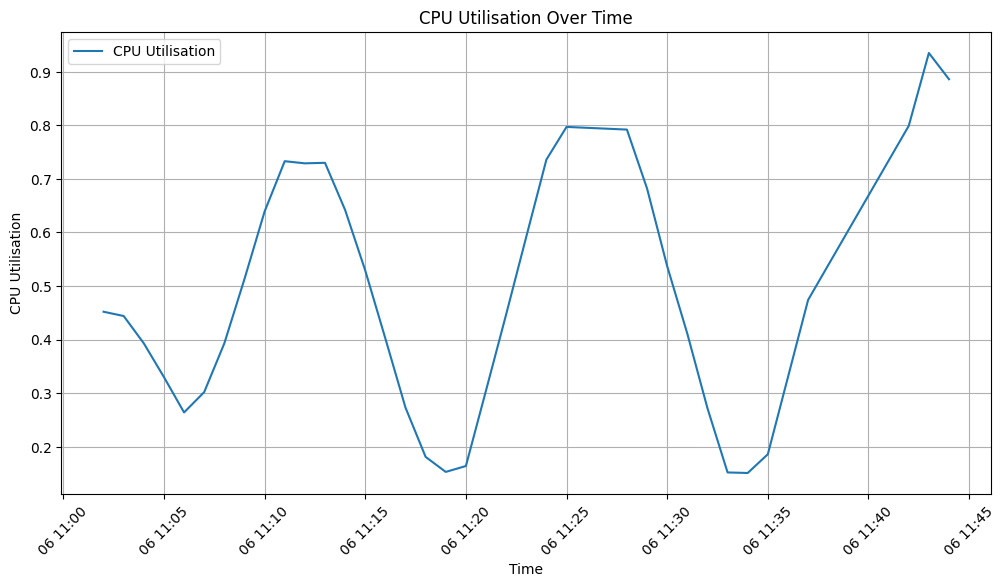

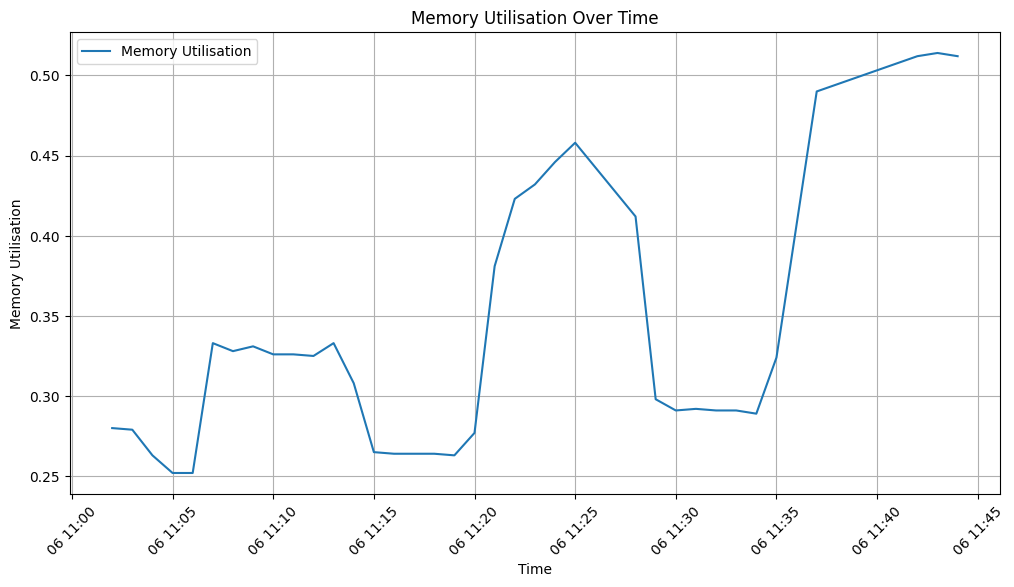

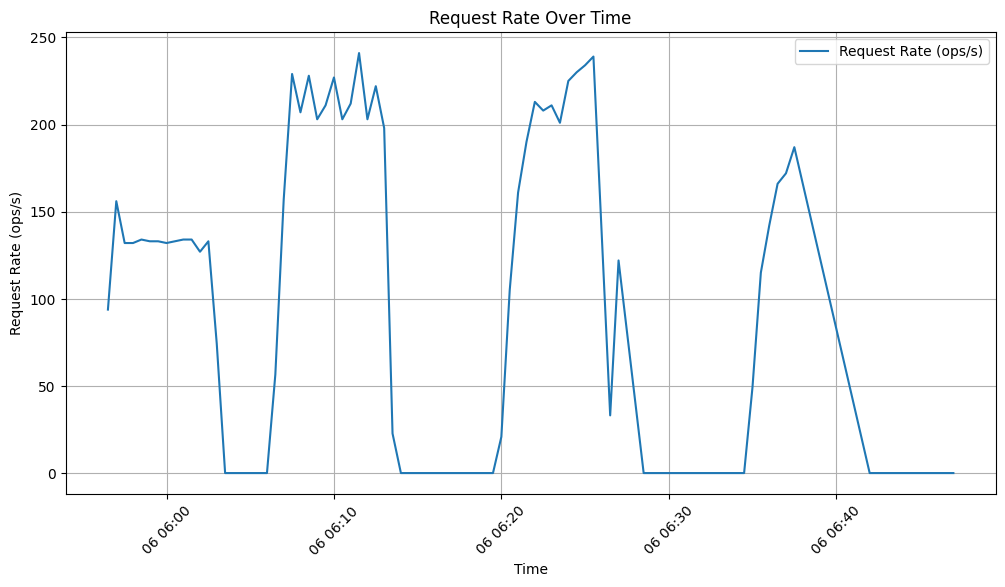

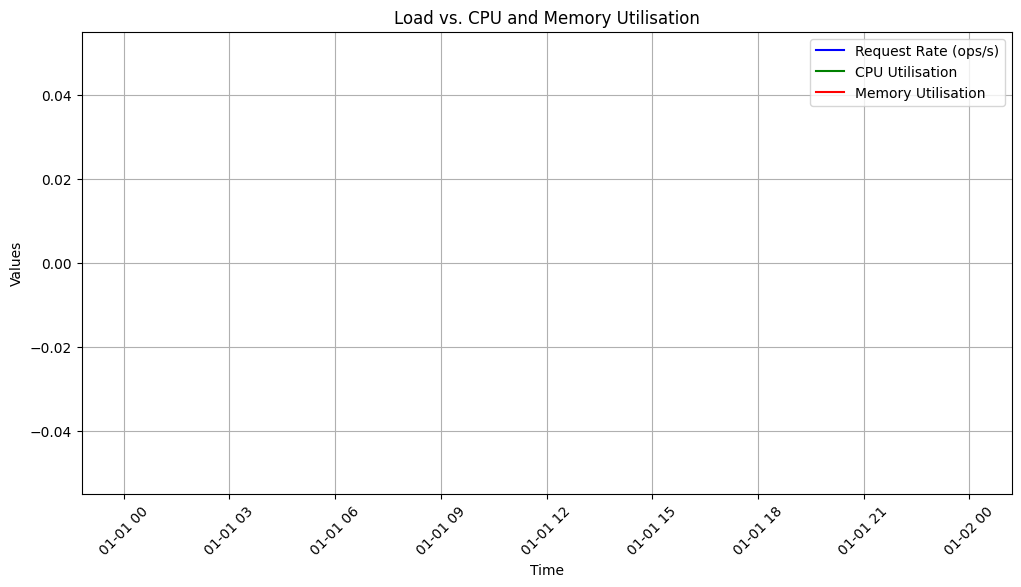

In [28]:
import matplotlib.pyplot as plt

# Prepare the load_df DataFrame
load_df = request_volume_df[["Time", request_rate_column]].rename(columns={request_rate_column: "Request Rate"})

# Merge dataframes on Time for the performance analysis
merged_df = cpu_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "CPU Utilisation"})
merged_df = merged_df.merge(memory_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "Memory Utilisation"}), on="Time")
merged_df = merged_df.merge(network_received_df[["Time", "bridge"]].rename(columns={"bridge": "Network Received"}), on="Time")
merged_df = merged_df.merge(network_transmitted_df[["Time", "bridge"]].rename(columns={"bridge": "Network Transmitted"}), on="Time")

# Plot individual dataframes to ensure they contain data
plt.figure(figsize=(12, 6))
plt.plot(cpu_utilisation_df["Time"], cpu_utilisation_df["192.168.49.2:9100"], label="CPU Utilisation")
plt.title("CPU Utilisation Over Time")
plt.xlabel("Time")
plt.ylabel("CPU Utilisation")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(memory_utilisation_df["Time"], memory_utilisation_df["192.168.49.2:9100"], label="Memory Utilisation")
plt.title("Memory Utilisation Over Time")
plt.xlabel("Time")
plt.ylabel("Memory Utilisation")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(load_df["Time"], load_df["Request Rate"], label="Request Rate (ops/s)")
plt.title("Request Rate Over Time")
plt.xlabel("Time")
plt.ylabel("Request Rate (ops/s)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Merge load data with performance metrics
performance_load_df = merged_df.merge(load_df, on="Time")

# Plot load vs. CPU and Memory Utilisation
plt.figure(figsize=(12, 6))
plt.plot(performance_load_df["Time"], performance_load_df["Request Rate"], label="Request Rate (ops/s)", color="blue")
plt.plot(performance_load_df["Time"], performance_load_df["CPU Utilisation"], label="CPU Utilisation", color="green")
plt.plot(performance_load_df["Time"], performance_load_df["Memory Utilisation"], label="Memory Utilisation", color="red")
plt.title("Load vs. CPU and Memory Utilisation")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV files
cpu_utilisation_file = "fhir-fastapiapp/CPU Utilisation-data-2024-08-06 08_32_27.csv"
memory_utilisation_file = "fhir-fastapiapp/Memory Utilisation-data-2024-08-06 08_32_38.csv"
network_received_file = "fhir-fastapiapp/Network Received-data-as-joinbyfield-2024-08-06 08_31_05.csv"
network_transmitted_file = "fhir-fastapiapp/Network Transmitted-data-as-joinbyfield-2024-08-06 08_31_26.csv"
request_volume_file = "fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv"

# Load the data into DataFrames
cpu_utilisation_df = pd.read_csv(cpu_utilisation_file)
memory_utilisation_df = pd.read_csv(memory_utilisation_file)
network_received_df = pd.read_csv(network_received_file)
network_transmitted_df = pd.read_csv(network_transmitted_file)
request_volume_df = pd.read_csv(request_volume_file)

# Convert Time columns to datetime
cpu_utilisation_df["Time"] = pd.to_datetime(cpu_utilisation_df["Time"])
memory_utilisation_df["Time"] = pd.to_datetime(memory_utilisation_df["Time"])
network_received_df["Time"] = pd.to_datetime(network_received_df["Time"])
network_transmitted_df["Time"] = pd.to_datetime(network_transmitted_df["Time"])
request_volume_df["Time"] = pd.to_datetime(request_volume_df["Time"])

# Convert percentage strings to numeric
cpu_utilisation_df["192.168.49.2:9100"] = cpu_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0
memory_utilisation_df["192.168.49.2:9100"] = memory_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0

# Convert Request Rate from 'ops/s' to numeric
request_rate_column = 'round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)'
request_volume_df[request_rate_column] = request_volume_df[request_rate_column].str.replace(' ops/s', '').astype(float)

# Convert Network usage to numeric
def convert_to_kbps(value):
    if isinstance(value, str):
        value = value.lower().replace(' kb/s', '').replace(' mb/s', '').strip()
        if 'm' in value:
            return float(value.replace('m', '').strip()) * 1000
        elif 'k' in value:
            return float(value.replace('k', '').strip())
        else:
            return float(value)
    return value

network_received_df["bridge"] = network_received_df["bridge"].apply(convert_to_kbps)
network_transmitted_df["bridge"] = network_transmitted_df["bridge"].apply(convert_to_kbps)

# Check data after conversion
print(cpu_utilisation_df.head())
print(memory_utilisation_df.head())
print(request_volume_df.head())
print(network_received_df.head())
print(network_transmitted_df.head())


                 Time  192.168.49.2:9100
0 2024-08-06 11:02:00              0.452
1 2024-08-06 11:03:00              0.444
2 2024-08-06 11:04:00              0.393
3 2024-08-06 11:05:00              0.330
4 2024-08-06 11:06:00              0.264
                 Time  192.168.49.2:9100
0 2024-08-06 11:02:00              0.280
1 2024-08-06 11:03:00              0.279
2 2024-08-06 11:04:00              0.263
3 2024-08-06 11:05:00              0.252
4 2024-08-06 11:06:00              0.252
                 Time  \
0 2024-08-06 05:56:30   
1 2024-08-06 05:57:00   
2 2024-08-06 05:57:30   
3 2024-08-06 05:58:00   
4 2024-08-06 05:58:30   

   round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)  
0                                               93.8                                                                                                      
1                                              

In [36]:
print("\nUnique Time Values in CPU Utilisation DataFrame:")
print(cpu_utilisation_df["Time"].unique())

print("\nUnique Time Values in Memory Utilisation DataFrame:")
print(memory_utilisation_df["Time"].unique())

print("\nUnique Time Values in Network Received DataFrame:")
print(network_received_df["Time"].unique())

print("\nUnique Time Values in Network Transmitted DataFrame:")
print(network_transmitted_df["Time"].unique())

print("\nUnique Time Values in Request Volume DataFrame:")
print(request_volume_df["Time"].unique())



Unique Time Values in CPU Utilisation DataFrame:
<DatetimeArray>
['2024-08-06 11:02:00', '2024-08-06 11:03:00', '2024-08-06 11:04:00',
 '2024-08-06 11:05:00', '2024-08-06 11:06:00', '2024-08-06 11:07:00',
 '2024-08-06 11:08:00', '2024-08-06 11:09:00', '2024-08-06 11:10:00',
 '2024-08-06 11:11:00', '2024-08-06 11:12:00', '2024-08-06 11:13:00',
 '2024-08-06 11:14:00', '2024-08-06 11:15:00', '2024-08-06 11:16:00',
 '2024-08-06 11:17:00', '2024-08-06 11:18:00', '2024-08-06 11:19:00',
 '2024-08-06 11:20:00', '2024-08-06 11:21:00', '2024-08-06 11:22:00',
 '2024-08-06 11:23:00', '2024-08-06 11:24:00', '2024-08-06 11:25:00',
 '2024-08-06 11:28:00', '2024-08-06 11:29:00', '2024-08-06 11:30:00',
 '2024-08-06 11:31:00', '2024-08-06 11:32:00', '2024-08-06 11:33:00',
 '2024-08-06 11:34:00', '2024-08-06 11:35:00', '2024-08-06 11:37:00',
 '2024-08-06 11:42:00', '2024-08-06 11:43:00', '2024-08-06 11:44:00']
Length: 36, dtype: datetime64[ns]

Unique Time Values in Memory Utilisation DataFrame:
<Dateti

In [37]:
# Prepare the load_df DataFrame
load_df = request_volume_df[["Time", request_rate_column]].rename(columns={request_rate_column: "Request Rate"})

# Merge CPU and Memory Utilisation DataFrames
merged_df = cpu_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "CPU Utilisation"})
merged_df = merged_df.merge(memory_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "Memory Utilisation"}), on="Time", how="outer")

# Check intermediate result
print("\nMerged CPU and Memory Utilisation DataFrame:")
print(merged_df.head())

# Merge with Network Received DataFrame
merged_df = merged_df.merge(network_received_df[["Time", "bridge"]].rename(columns={"bridge": "Network Received"}), on="Time", how="outer")

# Check intermediate result
print("\nMerged with Network Received DataFrame:")
print(merged_df.head())

# Merge with Network Transmitted DataFrame
merged_df = merged_df.merge(network_transmitted_df[["Time", "bridge"]].rename(columns={"bridge": "Network Transmitted"}), on="Time", how="outer")

# Check intermediate result
print("\nMerged with Network Transmitted DataFrame:")
print(merged_df.head())

# Merge with Load DataFrame
performance_load_df = merged_df.merge(load_df, on="Time", how="outer")

# Check final merged DataFrame
print("\nFinal Merged DataFrame:")
print(performance_load_df.head())



Merged CPU and Memory Utilisation DataFrame:
                 Time  CPU Utilisation  Memory Utilisation
0 2024-08-06 11:02:00            0.452               0.280
1 2024-08-06 11:03:00            0.444               0.279
2 2024-08-06 11:04:00            0.393               0.263
3 2024-08-06 11:05:00            0.330               0.252
4 2024-08-06 11:06:00            0.264               0.252

Merged with Network Received DataFrame:
                 Time  CPU Utilisation  Memory Utilisation  Network Received
0 2024-08-06 11:02:00            0.452               0.280              2.10
1 2024-08-06 11:03:00            0.444               0.279              1.91
2 2024-08-06 11:04:00            0.393               0.263            666.00
3 2024-08-06 11:05:00            0.330               0.252            168.00
4 2024-08-06 11:06:00            0.264               0.252            143.00

Merged with Network Transmitted DataFrame:
                 Time  CPU Utilisation  Memory Utilis

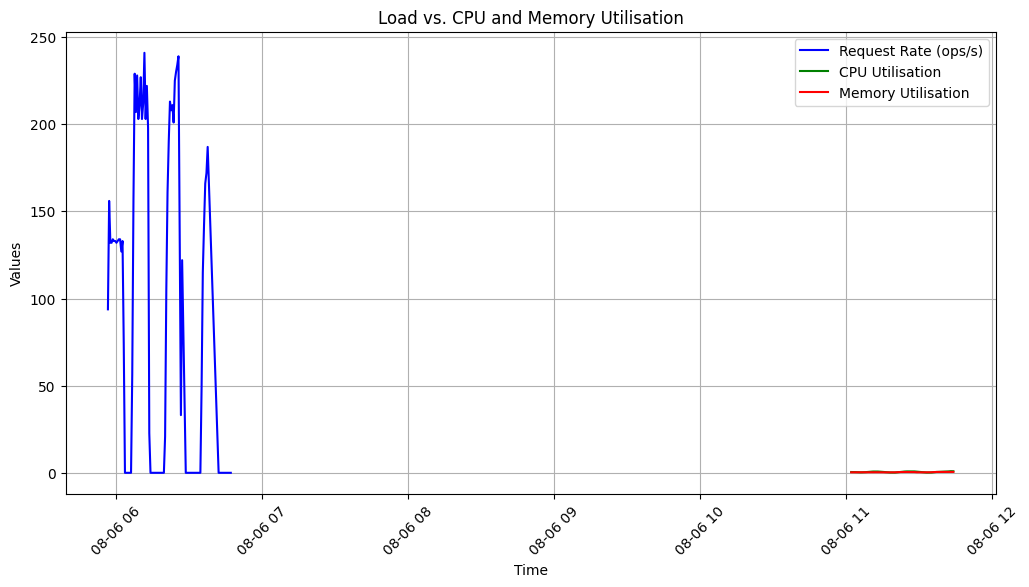

In [38]:
# Plot load vs. CPU and Memory Utilisation
plt.figure(figsize=(12, 6))
plt.plot(performance_load_df["Time"], performance_load_df["Request Rate"], label="Request Rate (ops/s)", color="blue")
plt.plot(performance_load_df["Time"], performance_load_df["CPU Utilisation"], label="CPU Utilisation", color="green")
plt.plot(performance_load_df["Time"], performance_load_df["Memory Utilisation"], label="Memory Utilisation", color="red")
plt.title("Load vs. CPU and Memory Utilisation")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


CPU Utilisation DataFrame:
                 Time  192.168.49.2:9100
0 2024-08-06 11:02:00              0.452
1 2024-08-06 11:03:00              0.444
2 2024-08-06 11:04:00              0.393
3 2024-08-06 11:05:00              0.330
4 2024-08-06 11:06:00              0.264                                 Time  192.168.49.2:9100
count                             36          36.000000
mean   2024-08-06 11:20:36.666666752           0.483889
min              2024-08-06 11:02:00           0.151000
25%              2024-08-06 11:10:45           0.294750
50%              2024-08-06 11:19:30           0.449500
75%              2024-08-06 11:30:15           0.693750
max              2024-08-06 11:44:00           0.935000
std                              NaN           0.231873
Memory Utilisation DataFrame:
                 Time  192.168.49.2:9100
0 2024-08-06 11:02:00              0.280
1 2024-08-06 11:03:00              0.279
2 2024-08-06 11:04:00              0.263
3 2024-08-06 11:05:00        

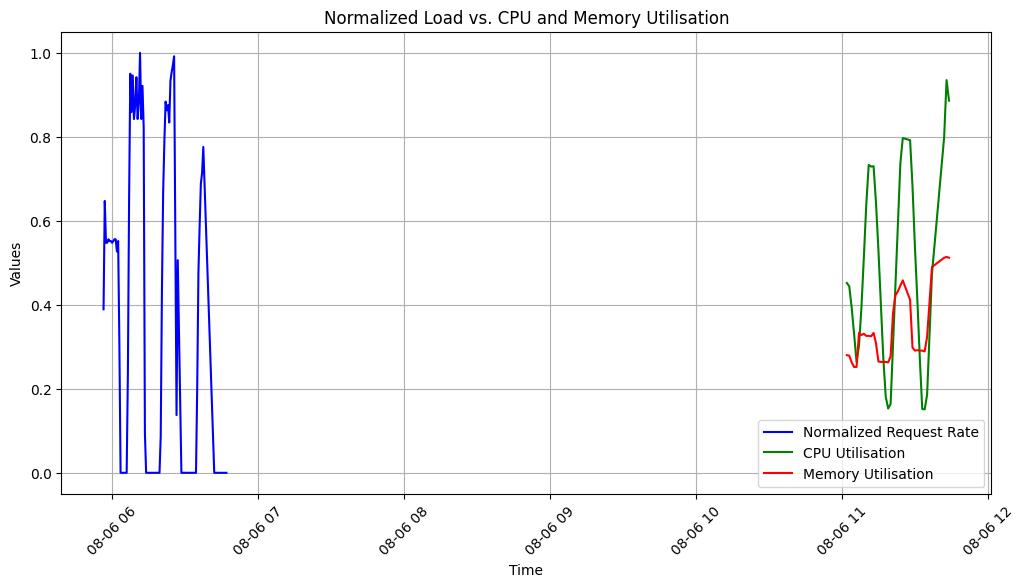

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV files
cpu_utilisation_file = "fhir-fastapiapp/CPU Utilisation-data-2024-08-06 08_32_27.csv"
memory_utilisation_file = "fhir-fastapiapp/Memory Utilisation-data-2024-08-06 08_32_38.csv"
network_received_file = "fhir-fastapiapp/Network Received-data-as-joinbyfield-2024-08-06 08_31_05.csv"
network_transmitted_file = "fhir-fastapiapp/Network Transmitted-data-as-joinbyfield-2024-08-06 08_31_26.csv"
request_volume_file = "fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv"

# Load the data into DataFrames
cpu_utilisation_df = pd.read_csv(cpu_utilisation_file)
memory_utilisation_df = pd.read_csv(memory_utilisation_file)
network_received_df = pd.read_csv(network_received_file)
network_transmitted_df = pd.read_csv(network_transmitted_file)
request_volume_df = pd.read_csv(request_volume_file)

# Convert Time columns to datetime
cpu_utilisation_df["Time"] = pd.to_datetime(cpu_utilisation_df["Time"])
memory_utilisation_df["Time"] = pd.to_datetime(memory_utilisation_df["Time"])
network_received_df["Time"] = pd.to_datetime(network_received_df["Time"])
network_transmitted_df["Time"] = pd.to_datetime(network_transmitted_df["Time"])
request_volume_df["Time"] = pd.to_datetime(request_volume_df["Time"])

# Convert percentage strings to numeric
cpu_utilisation_df["192.168.49.2:9100"] = cpu_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0
memory_utilisation_df["192.168.49.2:9100"] = memory_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0

# Convert Request Rate from 'ops/s' to numeric
request_rate_column = 'round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)'
request_volume_df[request_rate_column] = request_volume_df[request_rate_column].str.replace(' ops/s', '').astype(float)

# Convert Network usage to numeric
def convert_to_kbps(value):
    if isinstance(value, str):
        value = value.lower().replace(' kb/s', '').replace(' mb/s', '').strip()
        if 'm' in value:
            return float(value.replace('m', '').strip()) * 1000
        elif 'k' in value:
            return float(value.replace('k', '').strip())
        else:
            return float(value)
    return value

network_received_df["bridge"] = network_received_df["bridge"].apply(convert_to_kbps)
network_transmitted_df["bridge"] = network_transmitted_df["bridge"].apply(convert_to_kbps)

# Inspect individual DataFrames
print("CPU Utilisation DataFrame:")
print(cpu_utilisation_df.head(), cpu_utilisation_df.describe())

print("Memory Utilisation DataFrame:")
print(memory_utilisation_df.head(), memory_utilisation_df.describe())

print("Network Received DataFrame:")
print(network_received_df.head(), network_received_df.describe())

print("Network Transmitted DataFrame:")
print(network_transmitted_df.head(), network_transmitted_df.describe())

print("Request Volume DataFrame:")
print(request_volume_df.head(), request_volume_df.describe())

# Prepare the load_df DataFrame
load_df = request_volume_df[["Time", request_rate_column]].rename(columns={request_rate_column: "Request Rate"})

# Merge dataframes on Time for the performance analysis
merged_df = cpu_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "CPU Utilisation"})
print("\nMerged CPU Utilisation DataFrame:")
print(merged_df.head(), merged_df.describe())

merged_df = merged_df.merge(memory_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "Memory Utilisation"}), on="Time", how="outer")
print("\nMerged with Memory Utilisation DataFrame:")
print(merged_df.head(), merged_df.describe())

merged_df = merged_df.merge(network_received_df[["Time", "bridge"]].rename(columns={"bridge": "Network Received"}), on="Time", how="outer")
print("\nMerged with Network Received DataFrame:")
print(merged_df.head(), merged_df.describe())

merged_df = merged_df.merge(network_transmitted_df[["Time", "bridge"]].rename(columns={"bridge": "Network Transmitted"}), on="Time", how="outer")
print("\nMerged with Network Transmitted DataFrame:")
print(merged_df.head(), merged_df.describe())

# Merge load data with performance metrics
performance_load_df = merged_df.merge(load_df, on="Time", how="outer")
print("\nFinal Merged DataFrame:")
print(performance_load_df.head(), performance_load_df.describe())

# Normalize Request Rate for better comparison
max_request_rate = performance_load_df["Request Rate"].max()
performance_load_df["Normalized Request Rate"] = performance_load_df["Request Rate"] / max_request_rate

# Plot normalized load vs. CPU and Memory Utilisation
plt.figure(figsize=(12, 6))
plt.plot(performance_load_df["Time"], performance_load_df["Normalized Request Rate"], label="Normalized Request Rate", color="blue")
plt.plot(performance_load_df["Time"], performance_load_df["CPU Utilisation"], label="CPU Utilisation", color="green")
plt.plot(performance_load_df["Time"], performance_load_df["Memory Utilisation"], label="Memory Utilisation", color="red")
plt.title("Normalized Load vs. CPU and Memory Utilisation")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


                 Time  Latency (ms)  Throughput (ops/s)
0 2024-08-06 05:56:30         798.0                93.8
1 2024-08-06 05:57:00         553.0               156.0
2 2024-08-06 05:57:30         592.0               132.0
3 2024-08-06 05:58:00         591.0               132.0
4 2024-08-06 05:58:30         585.0               134.0
                                Time  Latency (ms)  Throughput (ops/s)
count                             88     49.000000           88.000000
mean   2024-08-06 06:19:07.159090944   1574.408163           88.926136
min              2024-08-06 05:56:30    553.000000            0.000000
25%       2024-08-06 06:07:22.500000    671.000000            0.000000
50%              2024-08-06 06:18:15    900.000000           65.450000
75%       2024-08-06 06:30:37.500000   1960.000000          175.750000
max              2024-08-06 06:47:00   4960.000000          241.000000
std                              NaN   1278.509711           91.535697


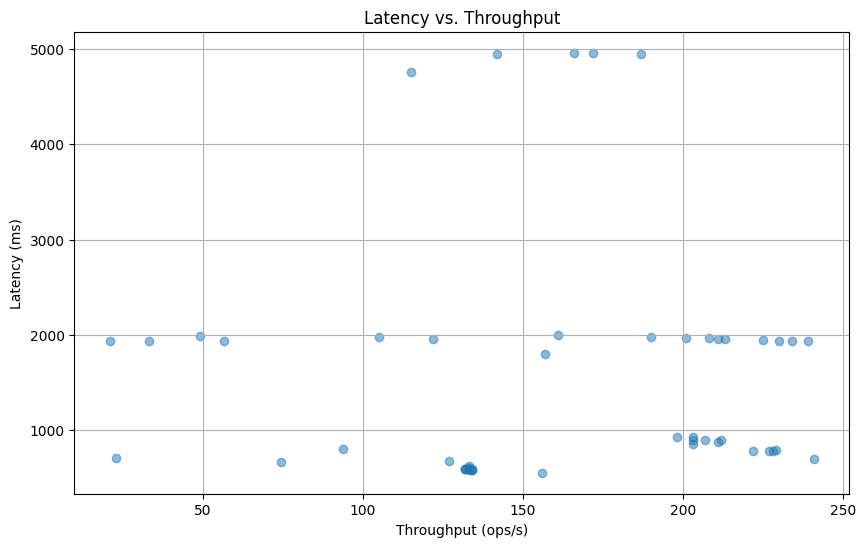

Correlation coefficient between latency and throughput: -0.01


In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import math
# Load the necessary CSV files
latency_file = "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv"
throughput_file = "fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv"

# Load the data into DataFrames
latency_df = pd.read_csv(latency_file)
throughput_df = pd.read_csv(throughput_file)

# Convert Time columns to datetime
latency_df["Time"] = pd.to_datetime(latency_df["Time"])
throughput_df["Time"] = pd.to_datetime(throughput_df["Time"])

# Function to convert latency to milliseconds
def convert_to_ms(value):

    if not value: return None
    if value is float: return value
    if value is str:
        value = value.lower().strip()
    if str(value)  == 'nan': return None
    if ' ms' in value:
        v=value.replace(' ms', '').strip()
        return float(value.replace(' ms', '').strip())
    elif ' s' in value:
        return float(value.replace(' s', '').strip()) * 1000
    else:
        return float(value)

# Convert latency columns to numeric (assume p99 latency for analysis)
latency_column = "00008 (p99)"
latency_df[latency_column] = latency_df[latency_column].apply(convert_to_ms)

# Convert throughput columns to numeric
throughput_column = 'round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)'
throughput_df[throughput_column] = throughput_df[throughput_column].str.replace(' ops/s', '').astype(float)

# Prepare the latency and throughput DataFrames
latency_df = latency_df[["Time", latency_column]].rename(columns={latency_column: "Latency (ms)"})
throughput_df = throughput_df[["Time", throughput_column]].rename(columns={throughput_column: "Throughput (ops/s)"})

# Merge dataframes on Time for the analysis
latency_throughput_df = latency_df.merge(throughput_df, on="Time", how="inner")

# Check the merged DataFrame
print(latency_throughput_df.head())
print(latency_throughput_df.describe())

# Plot the relationship between latency and throughput
plt.figure(figsize=(10, 6))
plt.scatter(latency_throughput_df["Throughput (ops/s)"], latency_throughput_df["Latency (ms)"], alpha=0.5)
plt.title("Latency vs. Throughput")
plt.xlabel("Throughput (ops/s)")
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.show()

# Calculate and display the correlation coefficient
correlation = latency_throughput_df["Throughput (ops/s)"].corr(latency_throughput_df["Latency (ms)"])
print(f"Correlation coefficient between latency and throughput: {correlation:.2f}")


Correlation coefficient between latency and throughput: -0.01
Time points with high latency:
                  Time  Latency (ms)  Throughput (ops/s)
20 2024-08-06 06:06:30        1940.0                56.6
21 2024-08-06 06:07:00        1800.0               157.0
47 2024-08-06 06:20:00        1930.0                20.8
48 2024-08-06 06:20:30        1980.0               105.0
49 2024-08-06 06:21:00        2000.0               161.0
50 2024-08-06 06:21:30        1980.0               190.0
51 2024-08-06 06:22:00        1960.0               213.0
52 2024-08-06 06:22:30        1970.0               208.0
53 2024-08-06 06:23:00        1960.0               211.0
54 2024-08-06 06:23:30        1970.0               201.0
55 2024-08-06 06:24:00        1950.0               225.0
56 2024-08-06 06:24:30        1940.0               230.0
57 2024-08-06 06:25:00        1940.0               234.0
58 2024-08-06 06:25:30        1930.0               239.0
59 2024-08-06 06:26:30        1940.0                

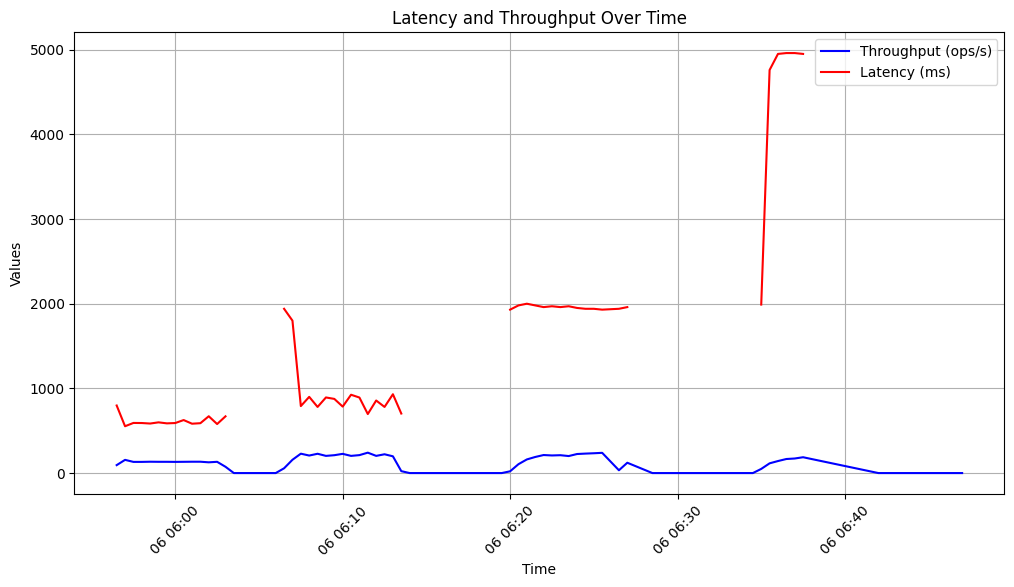

In [69]:
# Calculate and display the correlation coefficient
correlation = latency_throughput_df["Throughput (ops/s)"].corr(latency_throughput_df["Latency (ms)"])
print(f"Correlation coefficient between latency and throughput: {correlation:.2f}")

# Investigate time points with high latency
high_latency_df = latency_throughput_df[latency_throughput_df["Latency (ms)"] > 1000]
print("Time points with high latency:")
print(high_latency_df)

# Plot latency and throughput over time for detailed investigation
plt.figure(figsize=(12, 6))
plt.plot(latency_throughput_df["Time"], latency_throughput_df["Throughput (ops/s)"], label="Throughput (ops/s)", color="blue")
plt.plot(latency_throughput_df["Time"], latency_throughput_df["Latency (ms)"], label="Latency (ms)", color="red")
plt.title("Latency and Throughput Over Time")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


                 Time  Latency (ms)  Throughput (ops/s)
0 2024-08-06 05:56:30         798.0                93.8
1 2024-08-06 05:57:00         553.0               156.0
2 2024-08-06 05:57:30         592.0               132.0
3 2024-08-06 05:58:00         591.0               132.0
4 2024-08-06 05:58:30         585.0               134.0
                                Time  Latency (ms)  Throughput (ops/s)
count                             88     49.000000           88.000000
mean   2024-08-06 06:19:07.159090944   1574.408163           88.926136
min              2024-08-06 05:56:30    553.000000            0.000000
25%       2024-08-06 06:07:22.500000    671.000000            0.000000
50%              2024-08-06 06:18:15    900.000000           65.450000
75%       2024-08-06 06:30:37.500000   1960.000000          175.750000
max              2024-08-06 06:47:00   4960.000000          241.000000
std                              NaN   1278.509711           91.535697


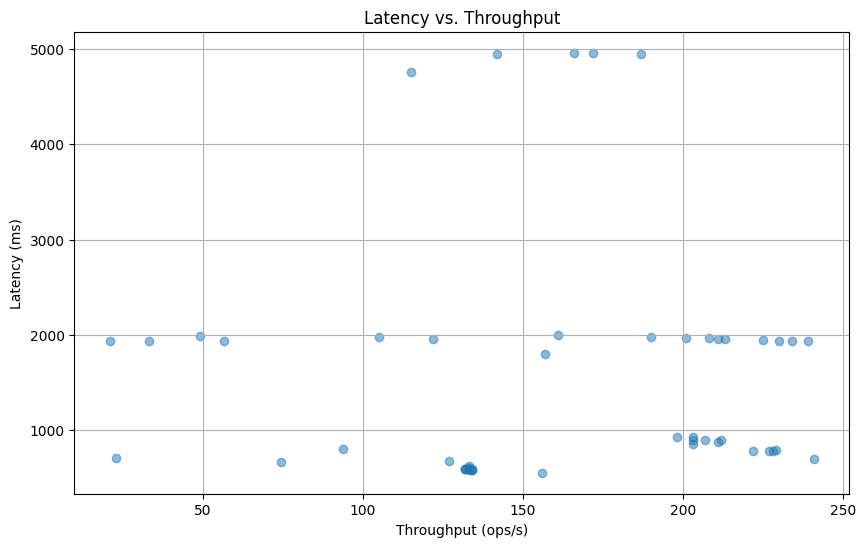

Correlation coefficient between latency and throughput: -0.01
Time points with high latency:
                  Time  Latency (ms)  Throughput (ops/s)
20 2024-08-06 06:06:30        1940.0                56.6
21 2024-08-06 06:07:00        1800.0               157.0
47 2024-08-06 06:20:00        1930.0                20.8
48 2024-08-06 06:20:30        1980.0               105.0
49 2024-08-06 06:21:00        2000.0               161.0
50 2024-08-06 06:21:30        1980.0               190.0
51 2024-08-06 06:22:00        1960.0               213.0
52 2024-08-06 06:22:30        1970.0               208.0
53 2024-08-06 06:23:00        1960.0               211.0
54 2024-08-06 06:23:30        1970.0               201.0
55 2024-08-06 06:24:00        1950.0               225.0
56 2024-08-06 06:24:30        1940.0               230.0
57 2024-08-06 06:25:00        1940.0               234.0
58 2024-08-06 06:25:30        1930.0               239.0
59 2024-08-06 06:26:30        1940.0                

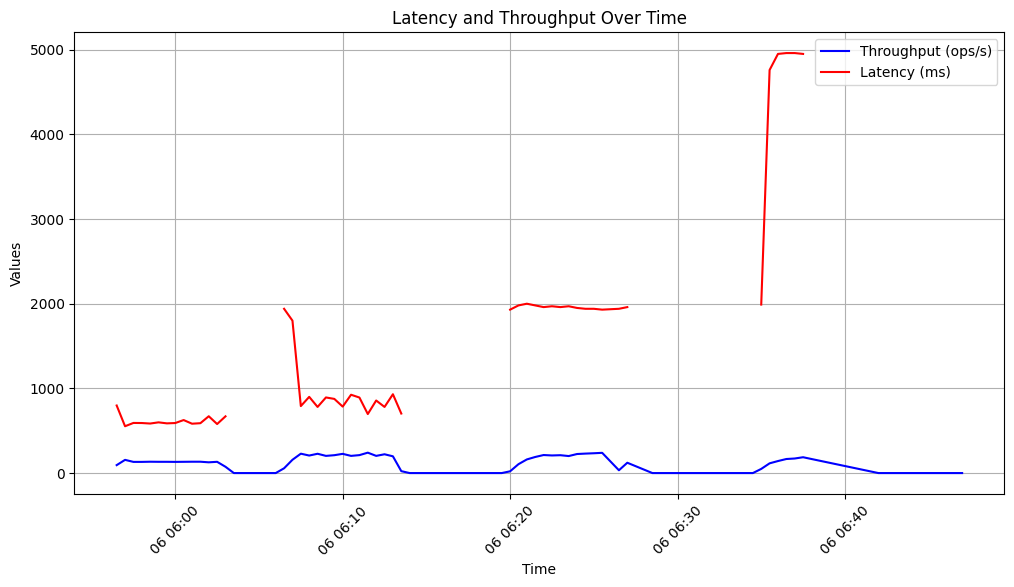

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV files
latency_file = "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv"
throughput_file = "fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv"

# Load the data into DataFrames
latency_df = pd.read_csv(latency_file)
throughput_df = pd.read_csv(throughput_file)

# Convert Time columns to datetime
latency_df["Time"] = pd.to_datetime(latency_df["Time"])
throughput_df["Time"] = pd.to_datetime(throughput_df["Time"])


# Convert latency columns to numeric (assume p99 latency for analysis)
latency_column = "00008 (p99)"
latency_df[latency_column] = latency_df[latency_column].apply(convert_to_ms)

# Convert throughput columns to numeric
throughput_column = 'round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)'
throughput_df[throughput_column] = throughput_df[throughput_column].str.replace(' ops/s', '').astype(float)

# Prepare the latency and throughput DataFrames
latency_df = latency_df[["Time", latency_column]].rename(columns={latency_column: "Latency (ms)"})
throughput_df = throughput_df[["Time", throughput_column]].rename(columns={throughput_column: "Throughput (ops/s)"})

# Merge dataframes on Time for the analysis
latency_throughput_df = latency_df.merge(throughput_df, on="Time", how="inner")

# Check the merged DataFrame
print(latency_throughput_df.head())
print(latency_throughput_df.describe())

# Plot the relationship between latency and throughput
plt.figure(figsize=(10, 6))
plt.scatter(latency_throughput_df["Throughput (ops/s)"], latency_throughput_df["Latency (ms)"], alpha=0.5)
plt.title("Latency vs. Throughput")
plt.xlabel("Throughput (ops/s)")
plt.ylabel("Latency (ms)")
plt.grid(True)
plt.show()

# Calculate and display the correlation coefficient
correlation = latency_throughput_df["Throughput (ops/s)"].corr(latency_throughput_df["Latency (ms)"])
print(f"Correlation coefficient between latency and throughput: {correlation:.2f}")

# Investigate time points with high latency
high_latency_df = latency_throughput_df[latency_throughput_df["Latency (ms)"] > 1000]
print("Time points with high latency:")
print(high_latency_df)

# Plot latency and throughput over time for detailed investigation
plt.figure(figsize=(12, 6))
plt.plot(latency_throughput_df["Time"], latency_throughput_df["Throughput (ops/s)"], label="Throughput (ops/s)", color="blue")
plt.plot(latency_throughput_df["Time"], latency_throughput_df["Latency (ms)"], label="Latency (ms)", color="red")
plt.title("Latency and Throughput Over Time")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [101]:
# Function to convert latency to milliseconds
# 
def convert_to_ms(value):

    if not value: return None
    if value is float: return value
    if value is str:
        value = value.lower().strip()
    if str(value)  == 'nan': return None
    if ' ms' in value:
        v=value.replace(' ms', '').strip()
        return float(value.replace(' ms', '').strip())
    elif ' s' in value:
        return float(value.replace(' s', '').strip()) * 1000
    else:
        return float(value)

Empty DataFrame
Columns: [Latency (ms), Throughput (ops/s), CPU Utilisation, Memory Utilisation, Time, Desired Pods, Actual Pods]
Index: []
       Latency (ms)  Throughput (ops/s)  CPU Utilisation  Memory Utilisation  \
count           0.0                 0.0              0.0                 0.0   
mean            NaN                 NaN              NaN                 NaN   
min             NaN                 NaN              NaN                 NaN   
25%             NaN                 NaN              NaN                 NaN   
50%             NaN                 NaN              NaN                 NaN   
75%             NaN                 NaN              NaN                 NaN   
max             NaN                 NaN              NaN                 NaN   
std             NaN                 NaN              NaN                 NaN   

      Time  Desired Pods  Actual Pods  
count    0           0.0          0.0  
mean   NaT           NaN          NaN  
min    NaT         

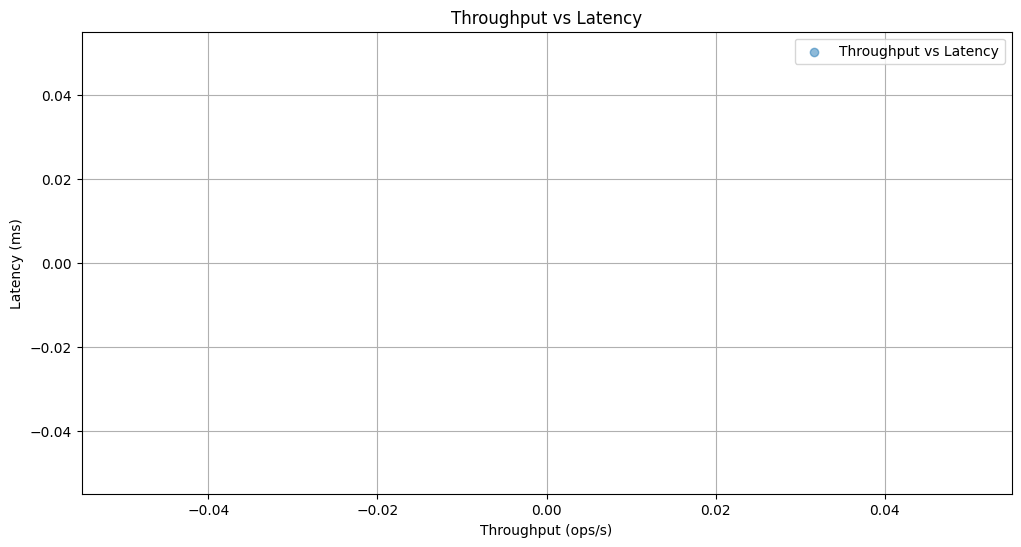

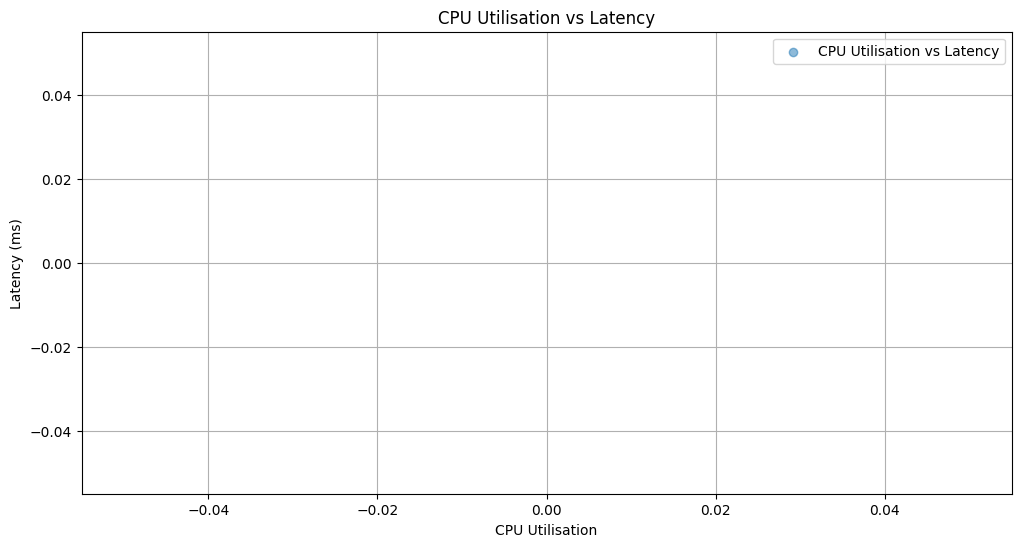

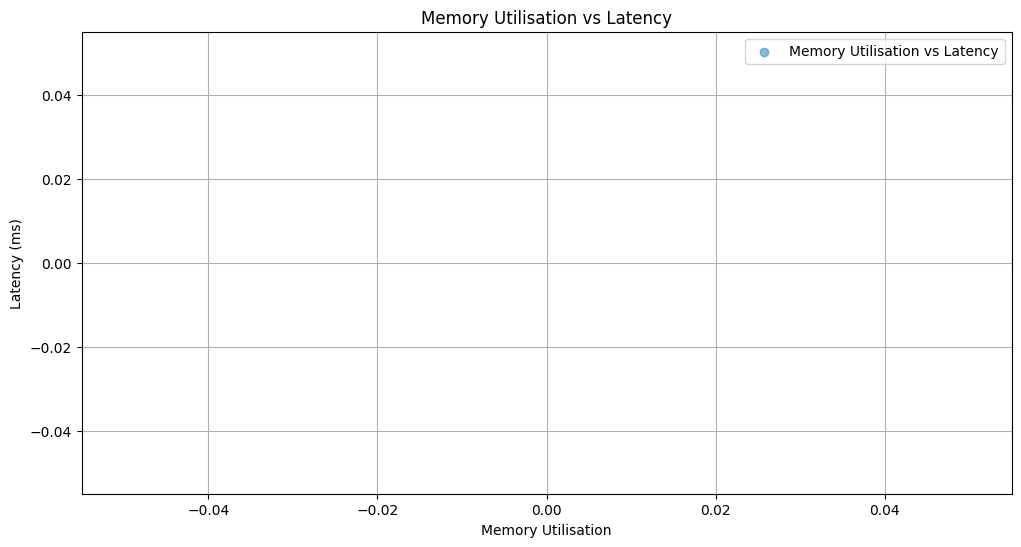

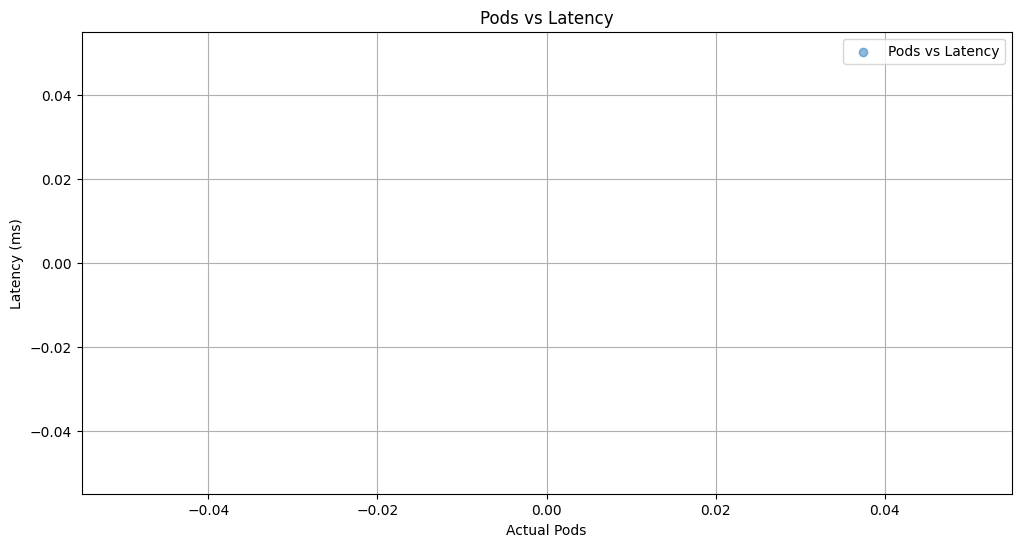

Correlation coefficient between throughput and latency: nan
Correlation coefficient between CPU utilisation and latency: nan
Correlation coefficient between memory utilisation and latency: nan
Correlation coefficient between number of pods and latency: nan


In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV files
latency_file = "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv"
throughput_file = "fhir-fastapiapp/Request Volume-data-2024-08-06 08_25_20.csv"
cpu_utilisation_file = "fhir-fastapiapp/CPU Utilisation-data-2024-08-06 08_32_27.csv"
memory_utilisation_file = "fhir-fastapiapp/Memory Utilisation-data-2024-08-06 08_32_38.csv"
pods_file = "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv"

# Load the data into DataFrames
latency_df = pd.read_csv(latency_file)
throughput_df = pd.read_csv(throughput_file)
cpu_utilisation_df = pd.read_csv(cpu_utilisation_file)
memory_utilisation_df = pd.read_csv(memory_utilisation_file)
pods_df = pd.read_csv(pods_file)

# Convert Time columns to datetime
latency_df["Time"] = pd.to_datetime(latency_df["Time"])
throughput_df["Time"] = pd.to_datetime(throughput_df["Time"])
cpu_utilisation_df["Time"] = pd.to_datetime(cpu_utilisation_df["Time"])
memory_utilisation_df["Time"] = pd.to_datetime(memory_utilisation_df["Time"])
pods_df["Time"] = pd.to_datetime(pods_df["Time"])


# Convert latency columns to numeric (assume p99 latency for analysis)
latency_column = "00008 (p99)"
latency_df[latency_column] = latency_df[latency_column].apply(convert_to_ms)

# Convert throughput columns to numeric
throughput_column = 'round(sum(rate(activator_request_count{namespace_name="default", revision_name=~"fastapi-app-00008", configuration_name=~"fastapi-app"}[1m])), 0.001)'
throughput_df[throughput_column] = throughput_df[throughput_column].str.replace(' ops/s', '').astype(float)

# Convert percentage strings to numeric for CPU and Memory Utilisation
cpu_utilisation_df["192.168.49.2:9100"] = cpu_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0
memory_utilisation_df["192.168.49.2:9100"] = memory_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0

# Prepare DataFrames
latency_df = latency_df[["Time", latency_column]].rename(columns={latency_column: "Latency (ms)"})
throughput_df = throughput_df[["Time", throughput_column]].rename(columns={throughput_column: "Throughput (ops/s)"})
cpu_utilisation_df = cpu_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "CPU Utilisation"})
memory_utilisation_df = memory_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "Memory Utilisation"})
pods_df = pods_df[["Time", "Desired Pods", "Actual Pods"]]

# Merge dataframes on Time for the analysis
merged_df = latency_df.merge(throughput_df, on="Time", how="inner")
merged_df = merged_df.merge(cpu_utilisation_df, on="Time", how="inner")
merged_df = merged_df.merge(memory_utilisation_df, on="Time", how="inner")
merged_df = merged_df.merge(pods_df, on="Time", how="inner")

# Check the merged DataFrame
print(merged_df.head())
print(merged_df.describe())

# Plot the relationships
plt.figure(figsize=(12, 6))
plt.scatter(merged_df["Throughput (ops/s)"], merged_df["Latency (ms)"], alpha=0.5, label="Throughput vs Latency")
plt.xlabel("Throughput (ops/s)")
plt.ylabel("Latency (ms)")
plt.title("Throughput vs Latency")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(merged_df["CPU Utilisation"], merged_df["Latency (ms)"], alpha=0.5, label="CPU Utilisation vs Latency")
plt.xlabel("CPU Utilisation")
plt.ylabel("Latency (ms)")
plt.title("CPU Utilisation vs Latency")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(merged_df["Memory Utilisation"], merged_df["Latency (ms)"], alpha=0.5, label="Memory Utilisation vs Latency")
plt.xlabel("Memory Utilisation")
plt.ylabel("Latency (ms)")
plt.title("Memory Utilisation vs Latency")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(merged_df["Actual Pods"], merged_df["Latency (ms)"], alpha=0.5, label="Pods vs Latency")
plt.xlabel("Actual Pods")
plt.ylabel("Latency (ms)")
plt.title("Pods vs Latency")
plt.grid(True)
plt.legend()
plt.show()

# Calculate and display the correlation coefficients
correlation_throughput_latency = merged_df["Throughput (ops/s)"].corr(merged_df["Latency (ms)"])
correlation_cpu_latency = merged_df["CPU Utilisation"].corr(merged_df["Latency (ms)"])
correlation_memory_latency = merged_df["Memory Utilisation"].corr(merged_df["Latency (ms)"])
correlation_pods_latency = merged_df["Actual Pods"].corr(merged_df["Latency (ms)"])

print(f"Correlation coefficient between throughput and latency: {correlation_throughput_latency:.2f}")
print(f"Correlation coefficient between CPU utilisation and latency: {correlation_cpu_latency:.2f}")
print(f"Correlation coefficient between memory utilisation and latency: {correlation_memory_latency:.2f}")
print(f"Correlation coefficient between number of pods and latency: {correlation_pods_latency:.2f}")


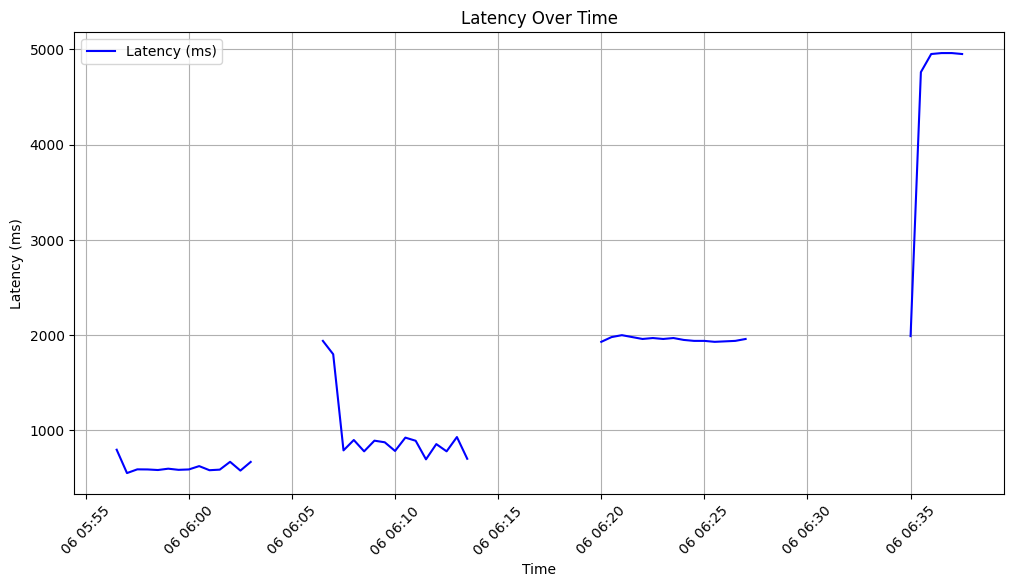

In [102]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV file
latency_file = "fhir-fastapiapp/Response Time in last minute-data-as-joinbyfield-2024-08-06 08_24_02.csv"

# Load the data into a DataFrame
latency_df = pd.read_csv(latency_file)

# Convert Time column to datetime
latency_df["Time"] = pd.to_datetime(latency_df["Time"])


# Convert latency column to numeric (assume p99 latency for analysis)
latency_column = "00008 (p99)"
latency_df[latency_column] = latency_df[latency_column].apply(convert_to_ms)

# Plot latency over time
plt.figure(figsize=(12, 6))
plt.plot(latency_df["Time"], latency_df[latency_column], label="Latency (ms)", color="blue")
plt.title("Latency Over Time")
plt.xlabel("Time")
plt.ylabel("Latency (ms)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


CPU Utilisation Time Range: 2024-08-06 11:02:00 - 2024-08-06 11:44:00
Memory Utilisation Time Range: 2024-08-06 11:02:00 - 2024-08-06 11:44:00
Pods Time Range: 2024-08-06 05:56:00 - 2024-08-06 06:47:00
                 Time  CPU Utilisation  Memory Utilisation  Desired Pods  \
0 2024-08-06 11:02:00            0.452               0.280           NaN   
1 2024-08-06 11:03:00            0.444               0.279           NaN   
2 2024-08-06 11:04:00            0.393               0.263           NaN   
3 2024-08-06 11:05:00            0.330               0.252           NaN   
4 2024-08-06 11:06:00            0.264               0.252           NaN   

   Actual Pods  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
                                Time  CPU Utilisation  Memory Utilisation  \
count                            136       136.000000          136.000000   
mean   2024-08-06 07:40:09.485294080         0.779559            0.466096   
min     

/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_64284/141151231.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


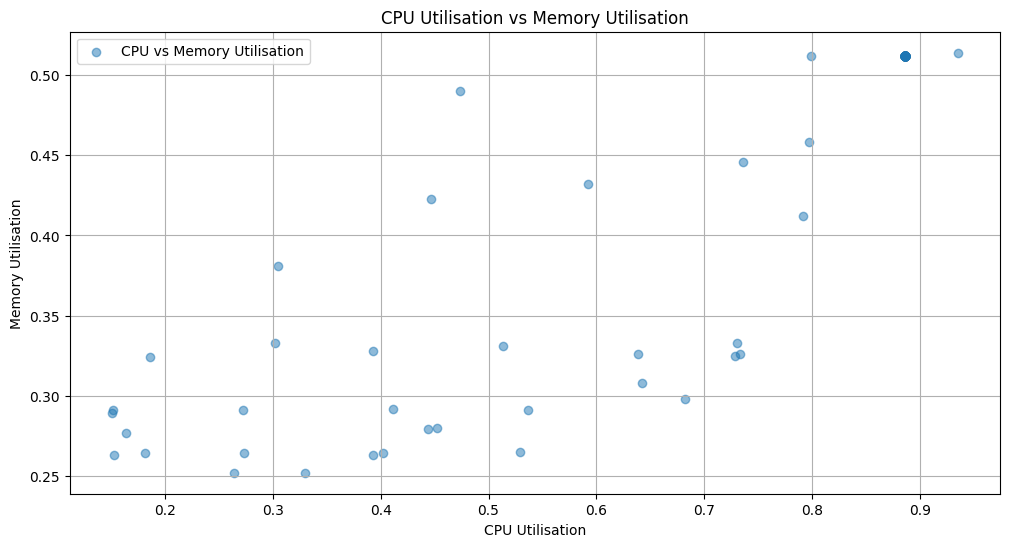

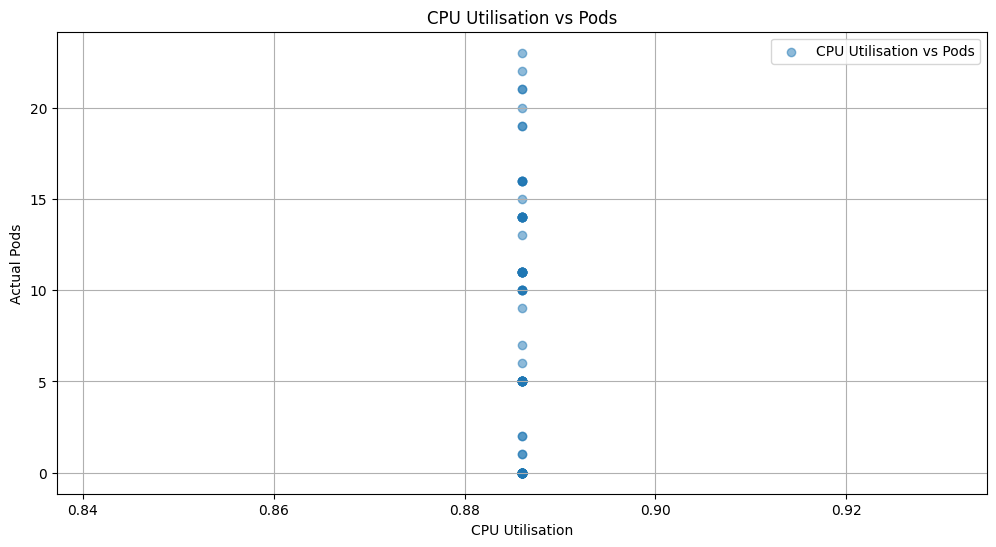

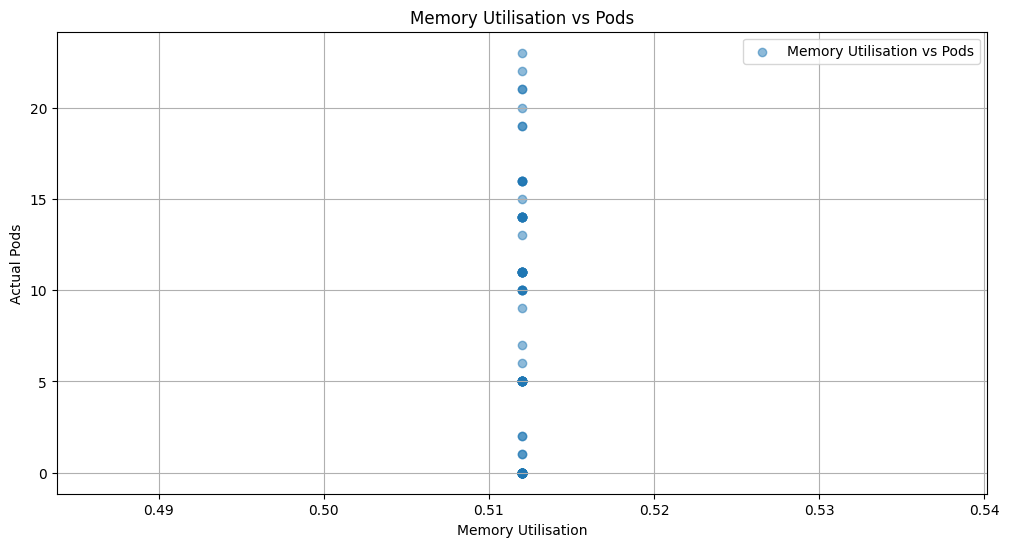

Correlation coefficient between CPU utilisation and memory utilisation: 0.91
Correlation coefficient between CPU utilisation and number of pods: -0.00
Correlation coefficient between memory utilisation and number of pods: 0.00


In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV files
cpu_utilisation_file = "fhir-fastapiapp/CPU Utilisation-data-2024-08-06 08_32_27.csv"
memory_utilisation_file = "fhir-fastapiapp/Memory Utilisation-data-2024-08-06 08_32_38.csv"
pods_file = "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv"

# Load the data into DataFrames
cpu_utilisation_df = pd.read_csv(cpu_utilisation_file)
memory_utilisation_df = pd.read_csv(memory_utilisation_file)
pods_df = pd.read_csv(pods_file)

# Convert Time columns to datetime
cpu_utilisation_df["Time"] = pd.to_datetime(cpu_utilisation_df["Time"])
memory_utilisation_df["Time"] = pd.to_datetime(memory_utilisation_df["Time"])
pods_df["Time"] = pd.to_datetime(pods_df["Time"])

# Convert percentage strings to numeric for CPU and Memory Utilisation
cpu_utilisation_df["192.168.49.2:9100"] = cpu_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0
memory_utilisation_df["192.168.49.2:9100"] = memory_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0

# Prepare DataFrames
cpu_utilisation_df = cpu_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "CPU Utilisation"})
memory_utilisation_df = memory_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "Memory Utilisation"})
pods_df = pods_df[["Time", "Desired Pods", "Actual Pods"]]

# Check time ranges of the dataframes
print(f"CPU Utilisation Time Range: {cpu_utilisation_df['Time'].min()} - {cpu_utilisation_df['Time'].max()}")
print(f"Memory Utilisation Time Range: {memory_utilisation_df['Time'].min()} - {memory_utilisation_df['Time'].max()}")
print(f"Pods Time Range: {pods_df['Time'].min()} - {pods_df['Time'].max()}")

# Merge dataframes on Time for the analysis using outer join
merged_df = cpu_utilisation_df.merge(memory_utilisation_df, on="Time", how="outer")
merged_df = merged_df.merge(pods_df, on="Time", how="outer")

# Fill missing values with method 'ffill' (forward fill)
merged_df.fillna(method='ffill', inplace=True)

# Check the merged DataFrame
print(merged_df.head())
print(merged_df.describe())

# Plot the relationships
plt.figure(figsize=(12, 6))
plt.scatter(merged_df["CPU Utilisation"], merged_df["Memory Utilisation"], alpha=0.5, label="CPU vs Memory Utilisation")
plt.xlabel("CPU Utilisation")
plt.ylabel("Memory Utilisation")
plt.title("CPU Utilisation vs Memory Utilisation")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(merged_df["CPU Utilisation"], merged_df["Actual Pods"], alpha=0.5, label="CPU Utilisation vs Pods")
plt.xlabel("CPU Utilisation")
plt.ylabel("Actual Pods")
plt.title("CPU Utilisation vs Pods")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(merged_df["Memory Utilisation"], merged_df["Actual Pods"], alpha=0.5, label="Memory Utilisation vs Pods")
plt.xlabel("Memory Utilisation")
plt.ylabel("Actual Pods")
plt.title("Memory Utilisation vs Pods")
plt.grid(True)
plt.legend()
plt.show()

# Calculate and display the correlation coefficients
correlation_cpu_memory = merged_df["CPU Utilisation"].corr(merged_df["Memory Utilisation"])
correlation_cpu_pods = merged_df["CPU Utilisation"].corr(merged_df["Actual Pods"])
correlation_memory_pods = merged_df["Memory Utilisation"].corr(merged_df["Actual Pods"])

print(f"Correlation coefficient between CPU utilisation and memory utilisation: {correlation_cpu_memory:.2f}")
print(f"Correlation coefficient between CPU utilisation and number of pods: {correlation_cpu_pods:.2f}")
print(f"Correlation coefficient between memory utilisation and number of pods: {correlation_memory_pods:.2f}")


/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_64284/3621558380.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


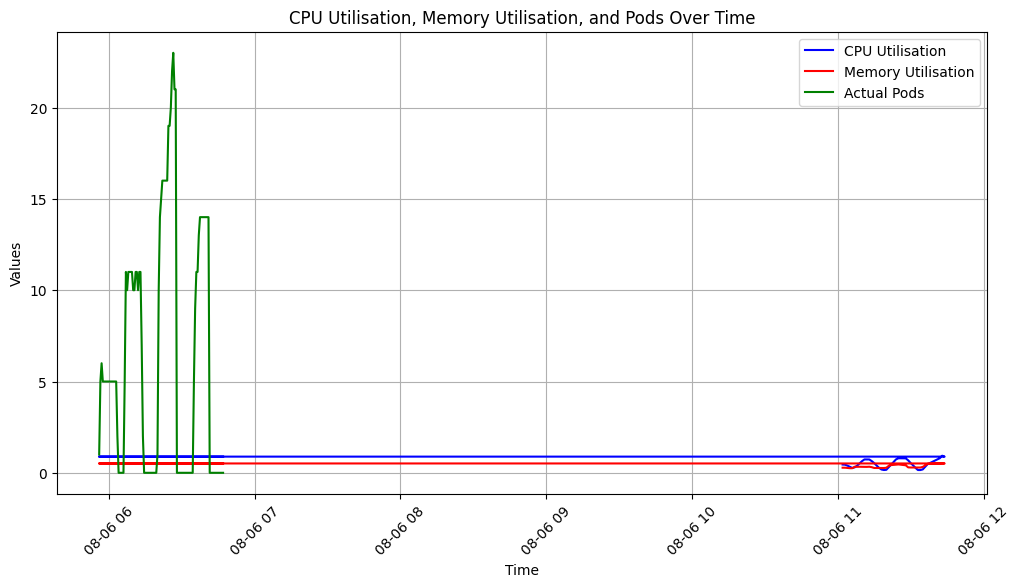

Correlation coefficient between CPU utilisation and memory utilisation: 0.91
Correlation coefficient between CPU utilisation and number of pods: -0.00
Correlation coefficient between memory utilisation and number of pods: 0.00


In [106]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV files
cpu_utilisation_file = "fhir-fastapiapp/CPU Utilisation-data-2024-08-06 08_32_27.csv"
memory_utilisation_file = "fhir-fastapiapp/Memory Utilisation-data-2024-08-06 08_32_38.csv"
pods_file = "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv"

# Load the data into DataFrames
cpu_utilisation_df = pd.read_csv(cpu_utilisation_file)
memory_utilisation_df = pd.read_csv(memory_utilisation_file)
pods_df = pd.read_csv(pods_file)

# Convert Time columns to datetime
cpu_utilisation_df["Time"] = pd.to_datetime(cpu_utilisation_df["Time"])
memory_utilisation_df["Time"] = pd.to_datetime(memory_utilisation_df["Time"])
pods_df["Time"] = pd.to_datetime(pods_df["Time"])

# Convert percentage strings to numeric for CPU and Memory Utilisation
cpu_utilisation_df["192.168.49.2:9100"] = cpu_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0
memory_utilisation_df["192.168.49.2:9100"] = memory_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0

# Prepare DataFrames
cpu_utilisation_df = cpu_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "CPU Utilisation"})
memory_utilisation_df = memory_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "Memory Utilisation"})
pods_df = pods_df[["Time", "Desired Pods", "Actual Pods"]]

# Merge dataframes on Time for the analysis using outer join
merged_df = cpu_utilisation_df.merge(memory_utilisation_df, on="Time", how="outer")
merged_df = merged_df.merge(pods_df, on="Time", how="outer")

# Fill missing values with method 'ffill' (forward fill)
merged_df.fillna(method='ffill', inplace=True)

# Plot CPU Utilisation, Memory Utilisation, and Pods over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_df["Time"], merged_df["CPU Utilisation"], label="CPU Utilisation", color="blue")
plt.plot(merged_df["Time"], merged_df["Memory Utilisation"], label="Memory Utilisation", color="red")
plt.plot(merged_df["Time"], merged_df["Actual Pods"], label="Actual Pods", color="green")
plt.xlabel("Time")
plt.ylabel("Values")
plt.title("CPU Utilisation, Memory Utilisation, and Pods Over Time")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Calculate and display the correlation coefficients
correlation_cpu_memory = merged_df["CPU Utilisation"].corr(merged_df["Memory Utilisation"])
correlation_cpu_pods = merged_df["CPU Utilisation"].corr(merged_df["Actual Pods"])
correlation_memory_pods = merged_df["Memory Utilisation"].corr(merged_df["Actual Pods"])

print(f"Correlation coefficient between CPU utilisation and memory utilisation: {correlation_cpu_memory:.2f}")
print(f"Correlation coefficient between CPU utilisation and number of pods: {correlation_cpu_pods:.2f}")
print(f"Correlation coefficient between memory utilisation and number of pods: {correlation_memory_pods:.2f}")


/var/folders/cv/9hhnz0554kv2s4xxz8kxrljr0000gn/T/ipykernel_64284/2990151352.py:33: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_df.fillna(method='ffill', inplace=True)


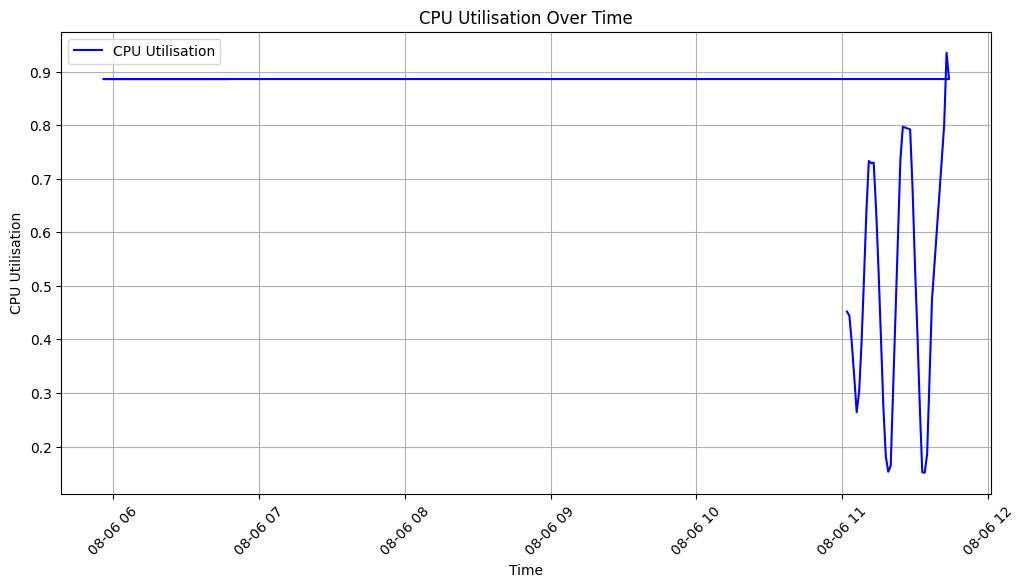

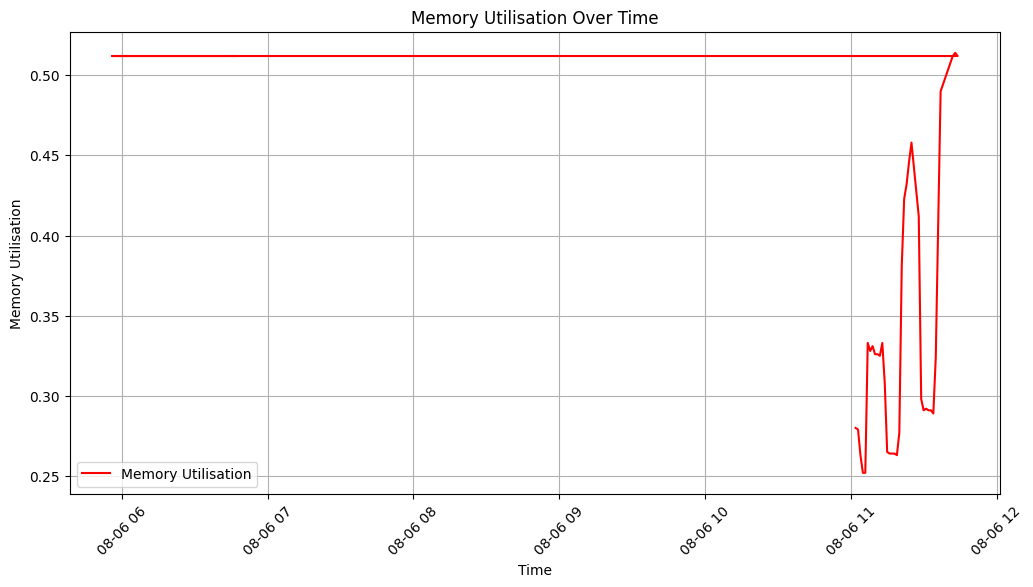

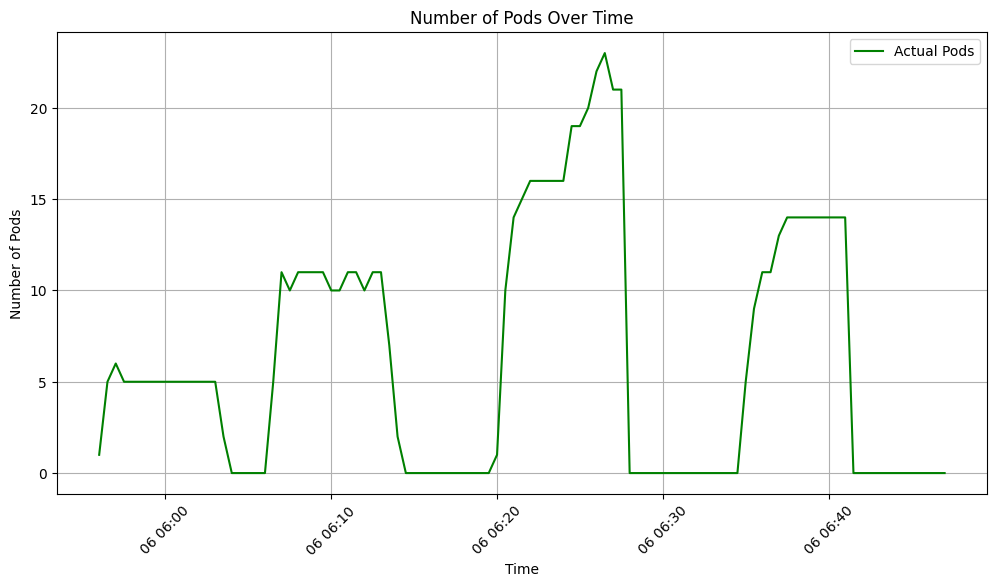

Correlation coefficient between CPU utilisation and memory utilisation: 0.91
Correlation coefficient between CPU utilisation and number of pods: -0.00
Correlation coefficient between memory utilisation and number of pods: 0.00


In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV files
cpu_utilisation_file = "fhir-fastapiapp/CPU Utilisation-data-2024-08-06 08_32_27.csv"
memory_utilisation_file = "fhir-fastapiapp/Memory Utilisation-data-2024-08-06 08_32_38.csv"
pods_file = "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv"

# Load the data into DataFrames
cpu_utilisation_df = pd.read_csv(cpu_utilisation_file)
memory_utilisation_df = pd.read_csv(memory_utilisation_file)
pods_df = pd.read_csv(pods_file)

# Convert Time columns to datetime
cpu_utilisation_df["Time"] = pd.to_datetime(cpu_utilisation_df["Time"])
memory_utilisation_df["Time"] = pd.to_datetime(memory_utilisation_df["Time"])
pods_df["Time"] = pd.to_datetime(pods_df["Time"])

# Convert percentage strings to numeric for CPU and Memory Utilisation
cpu_utilisation_df["192.168.49.2:9100"] = cpu_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0
memory_utilisation_df["192.168.49.2:9100"] = memory_utilisation_df["192.168.49.2:9100"].str.rstrip('%').astype('float') / 100.0

# Prepare DataFrames
cpu_utilisation_df = cpu_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "CPU Utilisation"})
memory_utilisation_df = memory_utilisation_df[["Time", "192.168.49.2:9100"]].rename(columns={"192.168.49.2:9100": "Memory Utilisation"})
pods_df = pods_df[["Time", "Desired Pods", "Actual Pods"]]

# Merge dataframes on Time for the analysis using outer join
merged_df = cpu_utilisation_df.merge(memory_utilisation_df, on="Time", how="outer")
merged_df = merged_df.merge(pods_df, on="Time", how="outer")

# Fill missing values with method 'ffill' (forward fill)
merged_df.fillna(method='ffill', inplace=True)

# Plot CPU Utilisation over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_df["Time"], merged_df["CPU Utilisation"], label="CPU Utilisation", color="blue")
plt.xlabel("Time")
plt.ylabel("CPU Utilisation")
plt.title("CPU Utilisation Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot Memory Utilisation over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_df["Time"], merged_df["Memory Utilisation"], label="Memory Utilisation", color="red")
plt.xlabel("Time")
plt.ylabel("Memory Utilisation")
plt.title("Memory Utilisation Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Plot Number of Pods over Time
plt.figure(figsize=(12, 6))
plt.plot(merged_df["Time"], merged_df["Actual Pods"], label="Actual Pods", color="green")
plt.xlabel("Time")
plt.ylabel("Number of Pods")
plt.title("Number of Pods Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

# Calculate and display the correlation coefficients
correlation_cpu_memory = merged_df["CPU Utilisation"].corr(merged_df["Memory Utilisation"])
correlation_cpu_pods = merged_df["CPU Utilisation"].corr(merged_df["Actual Pods"])
correlation_memory_pods = merged_df["Memory Utilisation"].corr(merged_df["Actual Pods"])

print(f"Correlation coefficient between CPU utilisation and memory utilisation: {correlation_cpu_memory:.2f}")
print(f"Correlation coefficient between CPU utilisation and number of pods: {correlation_cpu_pods:.2f}")
print(f"Correlation coefficient between memory utilisation and number of pods: {correlation_memory_pods:.2f}")


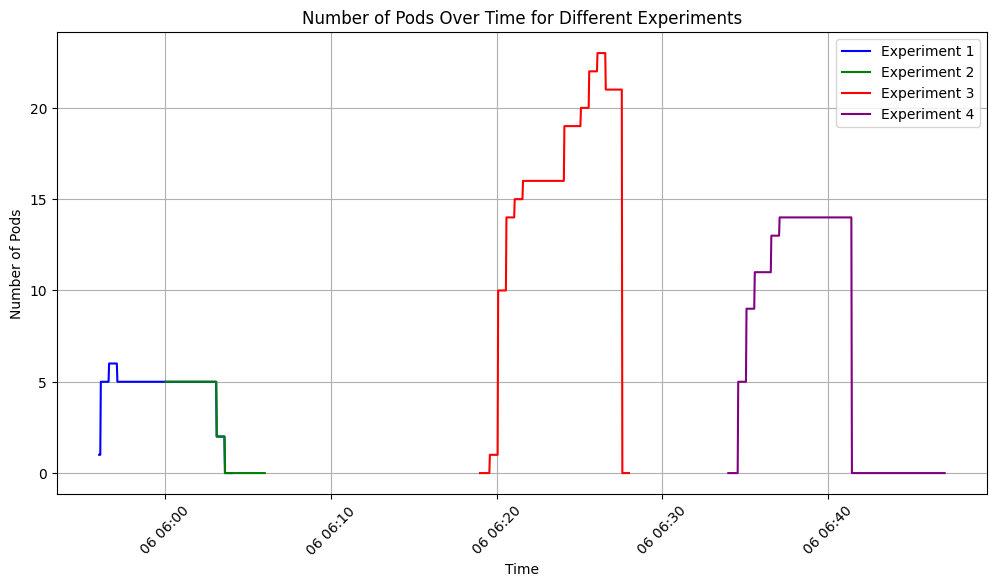

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV file for pods data
pods_file = "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv"
pods_file = "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv"
revision_pod_counts = pd.read_csv('fhir-fastapiapp/Revision Pod Counts-data-as-joinbyfield-2024-08-06 08_18_08.csv')

# Load the data into a DataFrame
#pods_df = pd.read_csv(pods_file)
pods_df = pd.read_csv('fhir-fastapiapp/Revision Pod Counts-data-as-joinbyfield-2024-08-06 08_18_08.csv')


# Convert the Time column to datetime
pods_df["Time"] = pd.to_datetime(pods_df["Time"])

# Plot Number of Pods over Time, highlighting different experiments with different colors
plt.figure(figsize=(12, 6))

# Identify the start and end times of each experiment
experiments = [
    {"start": "2024-08-06 05:56:00", "end": "2024-08-06 06:04:00", "label": "Experiment 1", "color": "blue"},
    {"start": "2024-08-06 06:00:00", "end": "2024-08-06 06:06:00", "label": "Experiment 2", "color": "green"},
    {"start": "2024-08-06 06:19:00", "end": "2024-08-06 06:28:00", "label": "Experiment 3", "color": "red"},
    {"start": "2024-08-06 06:34:00", "end": "2024-08-06 06:48:00", "label": "Experiment 4", "color": "purple"},
]

for exp in experiments:
    exp_df = pods_df[(pods_df["Time"] >= exp["start"]) & (pods_df["Time"] <= exp["end"])]
    plt.plot(exp_df["Time"], exp_df["Actual Pods"], label=exp["label"], color=exp["color"])

plt.xlabel("Time")
plt.ylabel("Number of Pods")
plt.title("Number of Pods Over Time for Different Experiments")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [111]:
pods_df

,Time,Actual Pods,Requested Pods,Pending Pods,NotReady Pods,Terminating Pods
0,2024-08-06 05:55:36,1,1,0,0,0
1,2024-08-06 05:55:38,1,1,0,0,0
2,2024-08-06 05:55:40,1,1,0,0,0
3,2024-08-06 05:55:42,1,1,0,0,0
4,2024-08-06 05:55:44,1,1,0,0,0
...,...,...,...,...,...,...
1493,2024-08-06 06:46:56,0,62,38,62,0
1494,2024-08-06 06:46:58,0,62,38,62,0
1495,2024-08-06 06:47:00,0,62,38,62,0
1496,2024-08-06 06:47:02,0,62,38,62,0


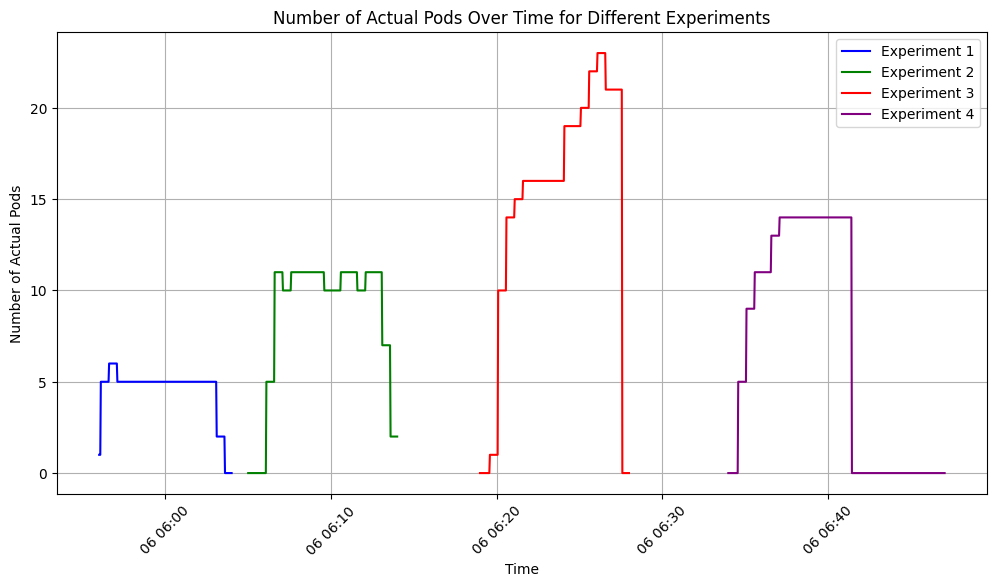

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV file for pods data
pods_file = "fhir-fastapiapp/Revision Pod Counts-data-as-joinbyfield-2024-08-06 08_18_08.csv"

# Load the data into a DataFrame
pods_df = pd.read_csv(pods_file)

# Convert the Time column to datetime
pods_df["Time"] = pd.to_datetime(pods_df["Time"])

# Define the experiment intervals
experiments = [
    {"start": "2024-08-06 05:56:00", "end": "2024-08-06 06:04:00", "label": "Experiment 1", "color": "blue"},
    {"start": "2024-08-06 06:05:00", "end": "2024-08-06 06:14:00", "label": "Experiment 2", "color": "green"},
    {"start": "2024-08-06 06:19:00", "end": "2024-08-06 06:28:00", "label": "Experiment 3", "color": "red"},
    {"start": "2024-08-06 06:34:00", "end": "2024-08-06 06:48:00", "label": "Experiment 4", "color": "purple"},
]

# Plot Number of Pods over Time, highlighting different experiments with different colors
plt.figure(figsize=(12, 6))

for exp in experiments:
    exp_df = pods_df[(pods_df["Time"] >= exp["start"]) & (pods_df["Time"] <= exp["end"])]
    plt.plot(exp_df["Time"], exp_df["Actual Pods"], label=exp["label"], color=exp["color"])

plt.xlabel("Time")
plt.ylabel("Number of Actual Pods")
plt.title("Number of Actual Pods Over Time for Different Experiments")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


In [115]:
pods_file = "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv"
pods_df = pd.read_csv(pods_file)

pods_df

,Time,Desired Pods,Actual Pods
0,2024-08-06 05:56:00,1,1
1,2024-08-06 05:56:30,6,5
2,2024-08-06 05:57:00,6,6
3,2024-08-06 05:57:30,5,5
4,2024-08-06 05:58:00,5,5
...,...,...,...
95,2024-08-06 06:43:30,62,0
96,2024-08-06 06:44:00,62,0
97,2024-08-06 06:46:00,62,0
98,2024-08-06 06:46:30,62,0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV file for pods data
pods_file = "fhir-fastapiapp/PLEG relist duration-data-2024-08-06 08_48_44.csv"

# Load the data into a DataFrame
pods_df = pd.read_csv(pods_file)

# Convert the Time column to datetime
pods_df["Time"] = pd.to_datetime(pods_df["Time"])

# Define the experiment intervals
experiments = [
    {"start": "2024-08-06 05:56:00", "end": "2024-08-06 06:04:00", "label": "Experiment 1", "color": "blue"},
    {"start": "2024-08-06 06:05:00", "end": "2024-08-06 06:14:00", "label": "Experiment 2", "color": "green"},
    {"start": "2024-08-06 06:19:00", "end": "2024-08-06 06:28:00", "label": "Experiment 3", "color": "red"},
    {"start": "2024-08-06 06:34:00", "end": "2024-08-06 06:48:00", "label": "Experiment 4", "color": "purple"},
]

# Plot Number of Pods over Time, highlighting different experiments with different colors
plt.figure(figsize=(12, 6))

for exp in experiments:
    exp_df = pods_df[(pods_df["Time"] >= exp["start"]) & (pods_df["Time"] <= exp["end"])]
    plt.plot(exp_df["Time"], exp_df["Actual Pods"], label=exp["label"], color=exp["color"])

plt.xlabel("Time")
plt.ylabel("Number of Actual Pods")
plt.title("Number of Actual Pods Over Time for Different Experiments")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()


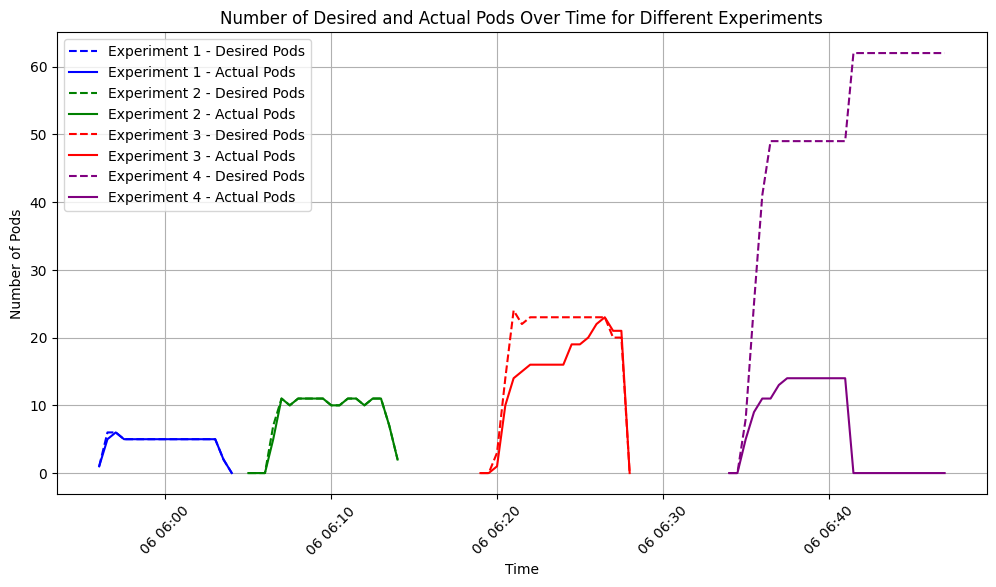

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the necessary CSV file for pods data
pods_file = "fhir-fastapiapp/Pod Counts-data-as-joinbyfield-2024-08-06 08_19_29.csv"

# Load the data into a DataFrame
pods_df = pd.read_csv(pods_file)

# Convert the Time column to datetime
pods_df["Time"] = pd.to_datetime(pods_df["Time"])

# Define the experiment intervals
experiments = [
    {"start": "2024-08-06 05:56:00", "end": "2024-08-06 06:04:00", "label": "Experiment 1", "color": "blue"},
    {"start": "2024-08-06 06:05:00", "end": "2024-08-06 06:14:00", "label": "Experiment 2", "color": "green"},
    {"start": "2024-08-06 06:19:00", "end": "2024-08-06 06:28:00", "label": "Experiment 3", "color": "red"},
    {"start": "2024-08-06 06:34:00", "end": "2024-08-06 06:48:00", "label": "Experiment 4", "color": "purple"},
]

# Plot Desired and Actual Pods over Time, highlighting different experiments with different colors
plt.figure(figsize=(12, 6))

for exp in experiments:
    exp_df = pods_df[(pods_df["Time"] >= exp["start"]) & (pods_df["Time"] <= exp["end"])]
    plt.plot(exp_df["Time"], exp_df["Desired Pods"], label=f"{exp['label']} - Desired Pods", color=exp["color"], linestyle="--")
    plt.plot(exp_df["Time"], exp_df["Actual Pods"], label=f"{exp['label']} - Actual Pods", color=exp["color"])

plt.xlabel("Time")
plt.ylabel("Number of Pods")
plt.title("Number of Desired and Actual Pods Over Time for Different Experiments")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()
